EN4.2.2 abyssal ocean trends compared to model

In [4]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots

from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
import scipy.interpolate
import scipy.ndimage
#import seawater as sw
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean.cm as cmocean
from dask.distributed import Client
import cartopy.feature as cfeature

import cartopy.crs as ccrs
import cmocean.cm as cmocean
import matplotlib.path as mpath
import matplotlib.gridspec as gridspec

import xesmf

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
client = Client(n_workers=8)
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36011 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:35567' processes=8 threads=8, memory=100.00 GiB>

In [6]:
def convert360_180(_ds):
    """
    convert longitude from 0-360 to -180 -- 180 deg
    """
    # check if already 
    attrs = _ds['lon'].attrs
    if _ds['lon'].min() >= 0:
        with xr.set_options(keep_attrs=True): 
            _ds.coords['lon'] = (_ds['lon'] + 180) % 360 - 180
        _ds = _ds.sortby('lon')
    return _ds

In [7]:
#load the trends and regrid to take anomalies
#m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
#p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_1to4_p.nc').__xarray_dataarray_variable__

#m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
#p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_4to6_p.nc').__xarray_dataarray_variable__

#m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
#p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_1to4_p.nc').__xarray_dataarray_variable__

#m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
#p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_4to6_p.nc').__xarray_dataarray_variable__

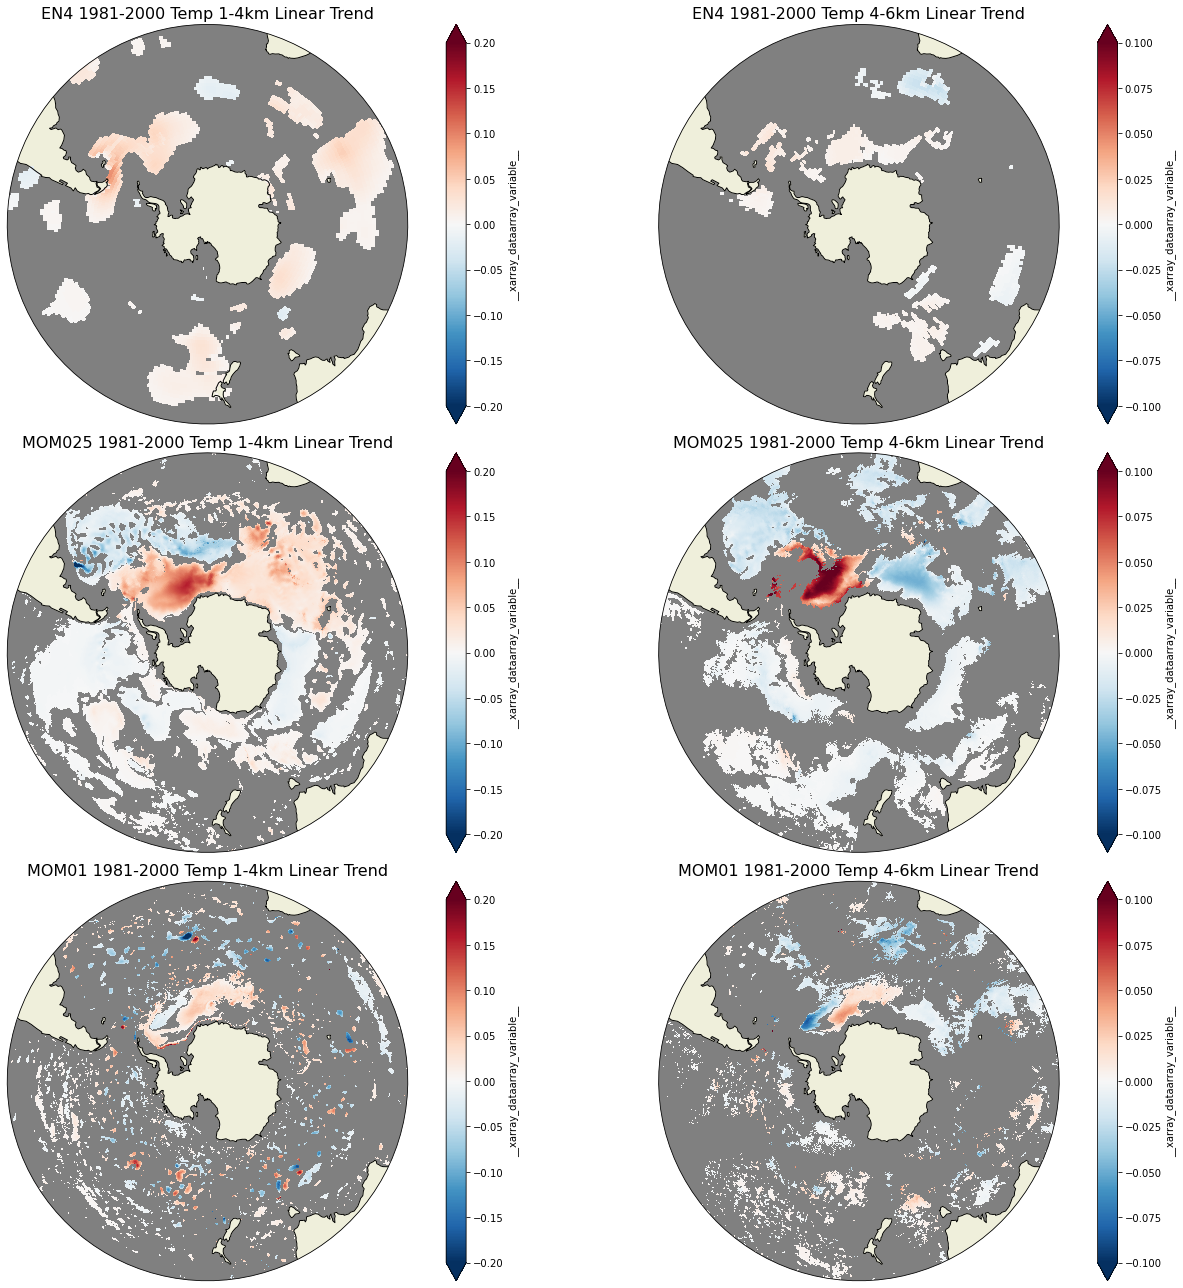

In [11]:
clev = np.arange(-.5,.55,.05)
clev = np.arange(-.2,.22,.02)

v1=-.2 #C/Decade *10 on load
v2=.2

pmax=0.05

fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(3,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='EN4 1981-2000 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

ax = plt.subplot(3,2,3, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM025 1981-2000 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

ax = plt.subplot(3,2,5, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to00_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to00_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM01 1981-2000 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


v1=-.1 #C/Decade *10 on load
v2=.1

ax = plt.subplot(3,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='EN4 1981-2000 Temp 4-6km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

ax = plt.subplot(3,2,4, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM025 1981-2000 Temp 4-6km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

ax = plt.subplot(3,2,6, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to00_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to00_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM01 1981-2000 Temp 4-6km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/EN4_TTrends_81to00.png'
plt.savefig(of,dpi=220,bbox_inches='tight')



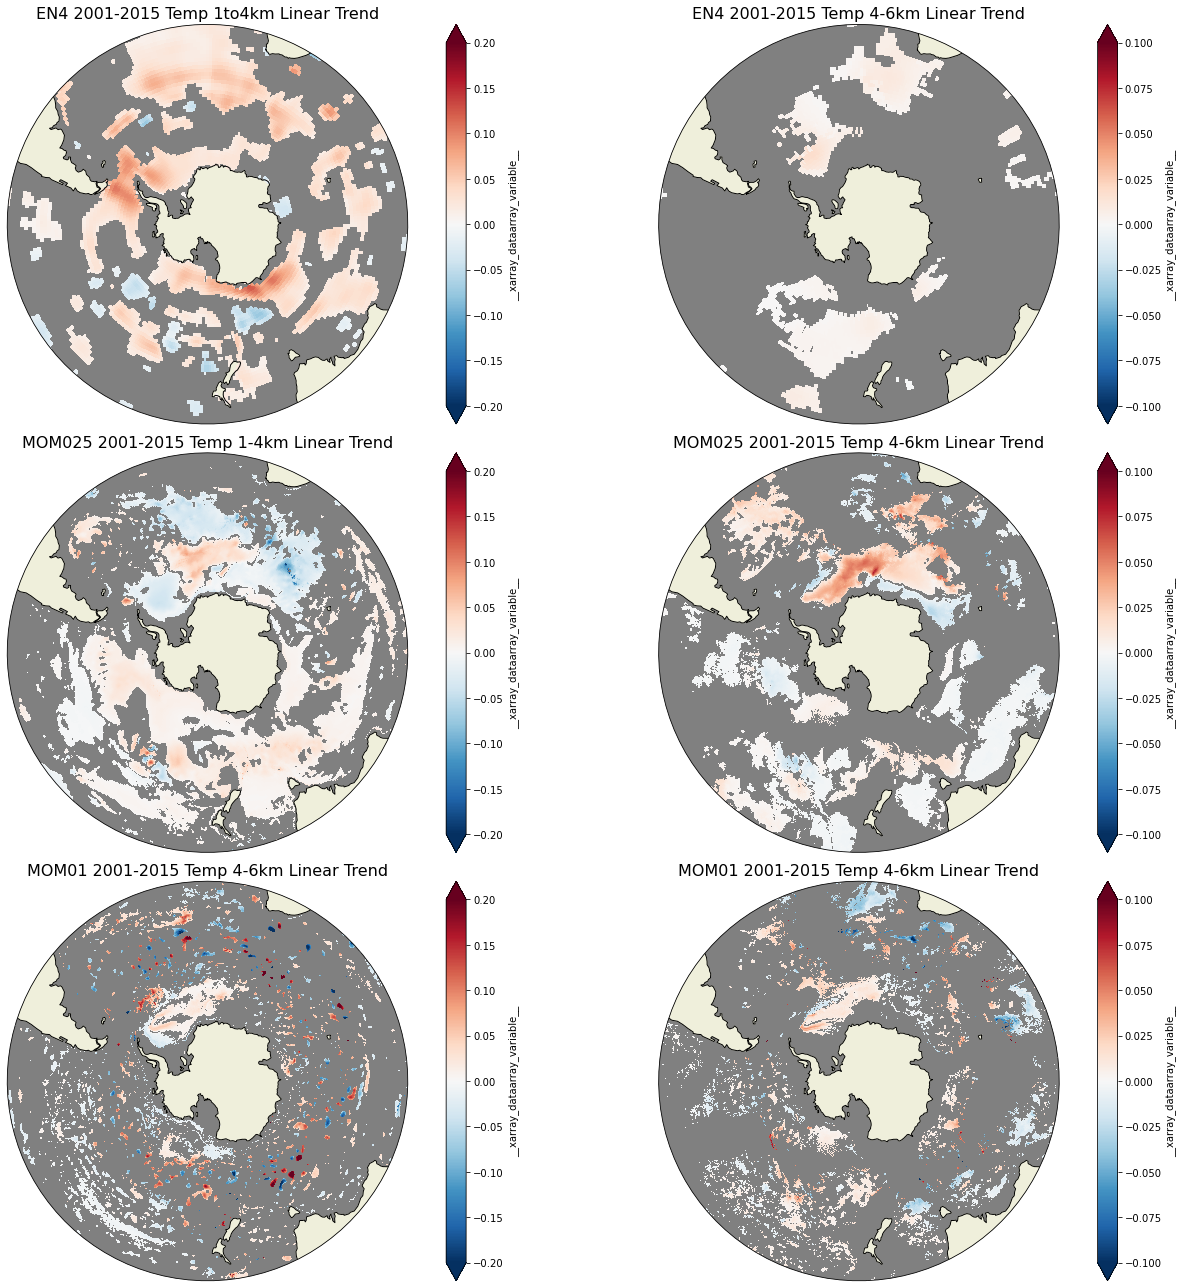

In [12]:
clev = np.arange(-.5,.55,.05)
clev = np.arange(-.2,.22,.02)

v1=-.2 #C/Decade *10 on load
v2=.2

pmax=0.05

fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(3,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='EN4 2001-2015 Temp 1to4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

ax = plt.subplot(3,2,3, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr01to15_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr01to15_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM025 2001-2015 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

ax = plt.subplot(3,2,5, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr01to15_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr01to15_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM01 2001-2015 Temp 4-6km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


v1=-.1 #C/Decade *10 on load
v2=.1

ax = plt.subplot(3,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='EN4 2001-2015 Temp 4-6km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

ax = plt.subplot(3,2,4, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr01to15_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr01to15_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM025 2001-2015 Temp 4-6km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

ax = plt.subplot(3,2,6, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr01to15_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr01to15_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM01 2001-2015 Temp 4-6km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/EN4_TTrends_01to15.png'
plt.savefig(of,dpi=220,bbox_inches='tight')



In [58]:
lat_slice  = slice(-84,-20)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_1to4_m.nc').sel(yt_ocean=lat_slice).__xarray_dataarray_variable__*10
m = m.assign_coords({'xt_ocean': m.xt_ocean + 100.})

m_interp=m.interp(xt_ocean=mEN.lon.data, yt_ocean=mEN.lat.data)
m_interp = m_interp.rename({'xt_ocean': 'lon', 'yt_ocean': 'lat'})


p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_1to4_p.nc').sel(yt_ocean=lat_slice).__xarray_dataarray_variable__
p = p.assign_coords({'xt_ocean': p.xt_ocean + 100.})
p_interp=p.interp(xt_ocean=mEN.lon.data, yt_ocean=mEN.lat.data)
p_interp = p_interp.rename({'xt_ocean': 'lon', 'yt_ocean': 'lat'})


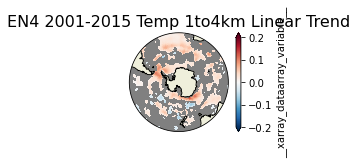

In [59]:
v1=-.2 #C/Decade *10 on load
v2=.2

ax = plt.subplot(2,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='EN4 2001-2015 Temp 1to4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

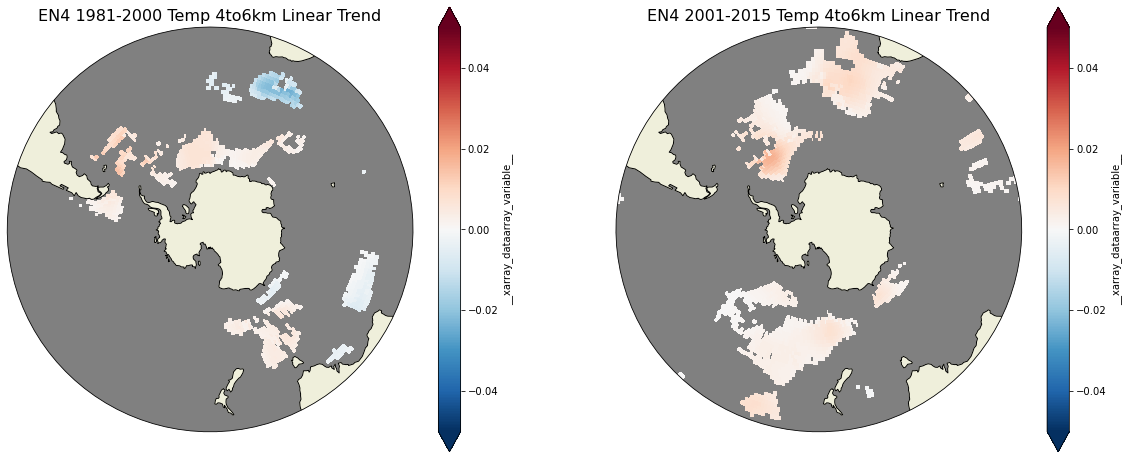

In [60]:
clev = np.arange(-.5,.55,.05)
clev = np.arange(-.2,.22,.02)

v1=-.05 #C/Decade *10 on load
v2=.05

pmax=0.05

fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(2,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='EN4 1981-2000 Temp 4to6km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


v1=-.05 #C/Decade *10 on load
v2=.05

ax = plt.subplot(2,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='EN4 2001-2015 Temp 4to6km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)




In [79]:
mEN=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
mEN = convert360_180(mEN)
mEN

pEN=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_1to4_p.nc').__xarray_dataarray_variable__
pEN = convert360_180(pEN)
pEN

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 64, lon: 360)>
[23040 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 -83.0 -82.0 -81.0 -80.0 ... -23.0 -22.0 -21.0 -20.0
  * lon      (lon) float32 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

In [80]:
lat_slice  = slice(-84,-20)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr81to00__Tanom_1to4_m.nc').sel(yt_ocean=lat_slice).__xarray_dataarray_variable__*10
m = m.assign_coords({'xt_ocean': m.xt_ocean + 100.})

m_interp=m.interp(xt_ocean=mEN.lon.data, yt_ocean=mEN.lat.data)
m_interp = m_interp.rename({'xt_ocean': 'lon', 'yt_ocean': 'lat'})


p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr81to00__Tanom_1to4_p.nc').sel(yt_ocean=lat_slice).__xarray_dataarray_variable__
p = p.assign_coords({'xt_ocean': p.xt_ocean + 100.})
p_interp=p.interp(xt_ocean=mEN.lon.data, yt_ocean=mEN.lat.data)
p_interp = p_interp.rename({'xt_ocean': 'lon', 'yt_ocean': 'lat'})

m_anom=mEN.where(pEN<=pmax)-m_interp.where(p_interp<=pmax)
m_anom

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 64, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -83.0 -82.0 -81.0 -80.0 ... -23.0 -22.0 -21.0 -20.0
  * lon      (lon) float32 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

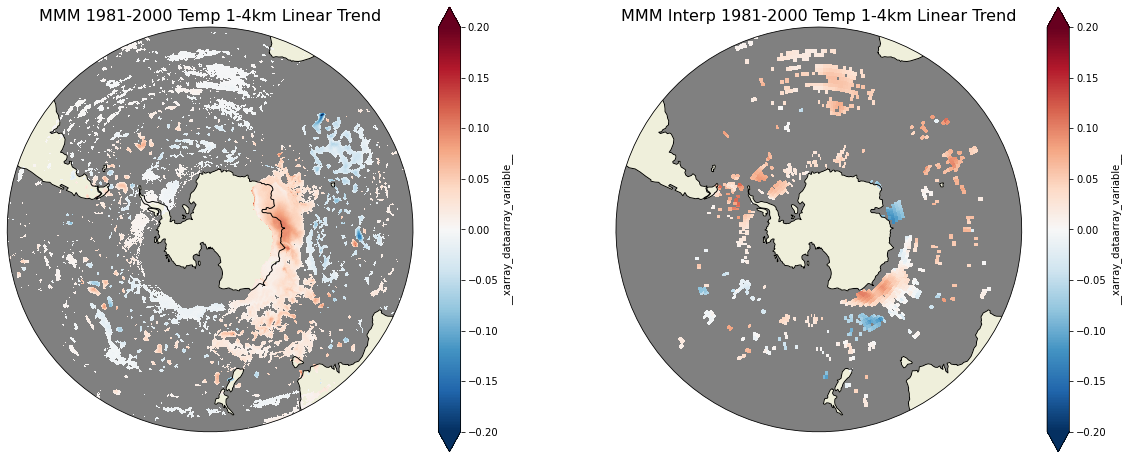

In [81]:
clev = np.arange(-.5,.55,.05)
clev = np.arange(-.2,.22,.02)

v1=-.2
v2=.2
pmax=0.05

fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(2,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MMM 1981-2000 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


v1=-.2 #C/Decade *10 on load
v2=.2

ax = plt.subplot(2,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

#p1 = m_interp.where(p_interp<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
p1 = m_anom.plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MMM Interp 1981-2000 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


In [83]:
lat_slice  = slice(-84,-20)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr81to00__Tanom_4to6_m.nc').sel(yt_ocean=lat_slice).__xarray_dataarray_variable__*10
m = m.assign_coords({'xt_ocean': m.xt_ocean + 100.})

m_interp=m.interp(xt_ocean=mEN.lon.data, yt_ocean=mEN.lat.data)
m_interp = m_interp.rename({'xt_ocean': 'lon', 'yt_ocean': 'lat'})


p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr81to00__Tanom_4to6_p.nc').sel(yt_ocean=lat_slice).__xarray_dataarray_variable__
p = p.assign_coords({'xt_ocean': p.xt_ocean + 100.})
p_interp=p.interp(xt_ocean=mEN.lon.data, yt_ocean=mEN.lat.data)
p_interp = p_interp.rename({'xt_ocean': 'lon', 'yt_ocean': 'lat'})

m_anom=mEN.where(pEN<=pmax)-m_interp.where(p_interp<=pmax)
m_anom

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 64, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -83.0 -82.0 -81.0 -80.0 ... -23.0 -22.0 -21.0 -20.0
  * lon      (lon) float32 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

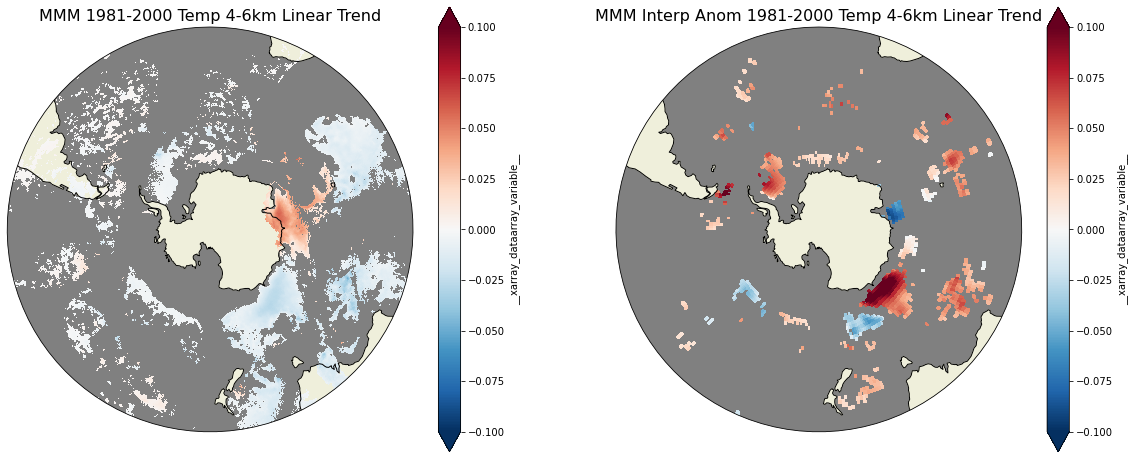

In [85]:
clev = np.arange(-.5,.55,.05)
clev = np.arange(-.2,.22,.02)

v1=-.1
v2=.1
pmax=0.05

fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(2,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MMM 1981-2000 Temp 4-6km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


v1=-.1 #C/Decade *10 on load
v2=.1

ax = plt.subplot(2,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

#p1 = m_interp.where(p_interp<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
p1 = m_anom.plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MMM Interp Anom 1981-2000 Temp 4-6km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


In [82]:
lat_slice  = slice(-84,-20)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_1to4_m.nc').sel(yt_ocean=lat_slice).__xarray_dataarray_variable__*10
m = m.assign_coords({'xt_ocean': m.xt_ocean + 100.})

m_interp=m.interp(xt_ocean=mEN.lon.data, yt_ocean=mEN.lat.data)
m_interp = m_interp.rename({'xt_ocean': 'lon', 'yt_ocean': 'lat'})


p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_1to4_p.nc').sel(yt_ocean=lat_slice).__xarray_dataarray_variable__
p = p.assign_coords({'xt_ocean': p.xt_ocean + 100.})
p_interp=p.interp(xt_ocean=mEN.lon.data, yt_ocean=mEN.lat.data)
p_interp = p_interp.rename({'xt_ocean': 'lon', 'yt_ocean': 'lat'})


In [63]:
m_anom=mEN.where(pEN<=pmax)-m_interp.where(p_interp<=pmax)
m_anom

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 64, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -83.0 -82.0 -81.0 -80.0 ... -23.0 -22.0 -21.0 -20.0
  * lon      (lon) float32 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

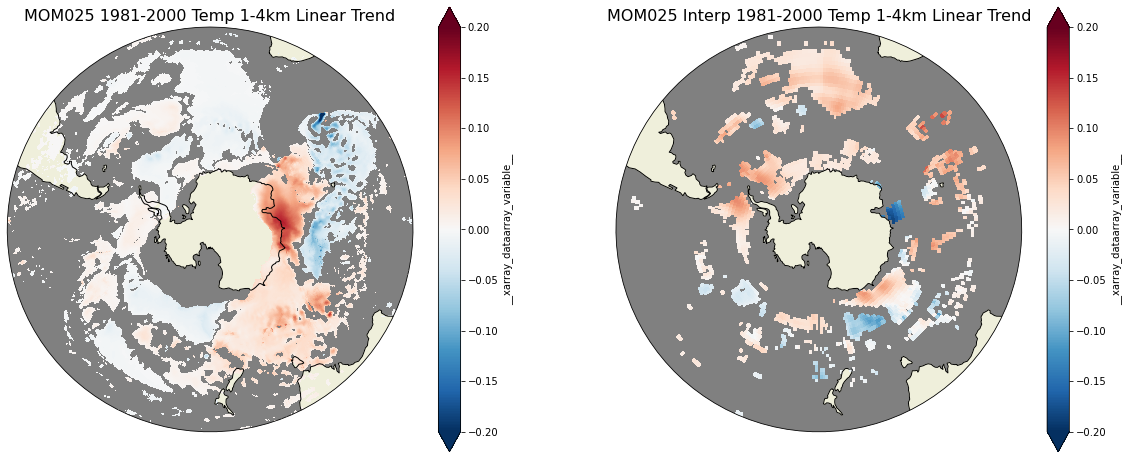

In [64]:
clev = np.arange(-.5,.55,.05)
clev = np.arange(-.2,.22,.02)

v1=-.2
v2=.2
pmax=0.05

fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(2,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM025 1981-2000 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


v1=-.2 #C/Decade *10 on load
v2=.2

ax = plt.subplot(2,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

#p1 = m_interp.where(p_interp<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
p1 = m_anom.plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM025 Interp 1981-2000 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


<xarray.DataArray '__xarray_dataarray_variable__' (yt_ocean: 416, xt_ocean: 1440)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.00287916, 0.00338195, 0.00324401, ..., 0.0022181 , 0.00250542,
        0.00262999],
       [0.00369381, 0.00376498, 0.00314805, ..., 0.00307322, 0.00338694,
        0.00365859],
       [0.00417517, 0.00382099, 0.00265571, ..., 0.0023206 , 0.00312136,
        0.00383774]])
Coordinates:
  * yt_ocean  (yt_ocean) float64 -81.08 -80.97 -80.87 ... -20.66 -20.43 -20.19
  * xt_ocean  (xt_ocean) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9

(360,)

In [82]:
m025_interp=m025.interp(xt_ocean=mEN.lon.data, yt_ocean=mEN.lat.data)
m025_interp

<xarray.DataArray '__xarray_dataarray_variable__' (yt_ocean: 64, xt_ocean: 360)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,  0.00478004,  0.00319634, ...,  0.00090868,
        -0.00181345, -0.0009301 ],
       [        nan,  0.0018368 ,  0.00171698, ..., -0.00263359,
        -0.00127855, -0.00059957],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * xt_ocean  (xt_ocean) float32 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * yt_ocean  (yt_ocean) float32 -83.0 -82.0 -81.0 -80.0 ... -22.0 -21.0 -20.0

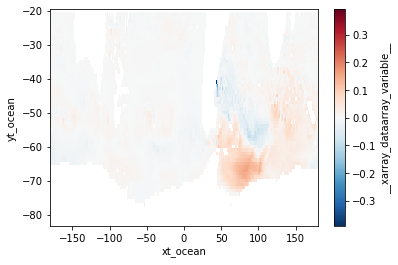

In [83]:
m025_interp.plot()

In [56]:
mEN=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10

mEN = convert360_180(mEN)

mEN = mEN.rename({'lon': 'longitude', 'lat': 'latitude'})
mEN

<xarray.DataArray '__xarray_dataarray_variable__' (latitude: 64, longitude: 360)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.00294192,  0.00403796, -0.00159294, ..., -0.001292  ,
         0.0019679 ,  0.00366629],
       [ 0.00586029,  0.00906148,  0.00499035, ..., -0.00310863,
         0.00161231,  0.00492376],
       [ 0.00911066,  0.0096578 ,  0.00962811, ..., -0.00396637,
         0.00211186,  0.00678541]])
Coordinates:
  * latitude   (latitude) float32 -83.0 -82.0 -81.0 -80.0 ... -22.0 -21.0 -20.0
  * longitude  (longitude) float32 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0

In [57]:
mEN.latitude[-1]

<xarray.DataArray 'latitude' ()>
array(-20., dtype=float32)
Coordinates:
    latitude  float32 -20.0
Attributes:
    long_name:      latitude
    units:          degrees_north
    standard_name:  latitude

In [91]:
lat_slice  = slice(-84,-20)

m025=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_1to4_m.nc').sel(yt_ocean=lat_slice).__xarray_dataarray_variable__*10
p025=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_1to4_p.nc').sel(yt_ocean=lat_slice).__xarray_dataarray_variable__


In [92]:
m025 = m025.assign_coords({'xt_ocean': m025.xt_ocean + 100.})
#m025 = m025.rename({'xt_ocean': 'longitude', 'yt_ocean': 'latitude'})
m025

<xarray.DataArray '__xarray_dataarray_variable__' (yt_ocean: 416, xt_ocean: 1440)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.00287916, 0.00338195, 0.00324401, ..., 0.0022181 , 0.00250542,
        0.00262999],
       [0.00369381, 0.00376498, 0.00314805, ..., 0.00307322, 0.00338694,
        0.00365859],
       [0.00417517, 0.00382099, 0.00265571, ..., 0.0023206 , 0.00312136,
        0.00383774]])
Coordinates:
  * yt_ocean  (yt_ocean) float64 -81.08 -80.97 -80.87 ... -20.66 -20.43 -20.19
  * xt_ocean  (xt_ocean) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9

In [63]:
%%time
#ds_in_025deg = ssh_025.drop({'x', 'y'})
regridder_025_EN = xesmf.Regridder(m025, mEN, 'bilinear', periodic=True,
                                                 filename='bilinear_tracer_weights_in025degACCESSOM2_outEN.nc', reuse_weights=os.path.exists('bilinear_tracer_weights_in025degACCESSOM2_outEN.nc'))
regridder_025_EN

CPU times: user 11 s, sys: 291 ms, total: 11.3 s
Wall time: 11.1 s


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_tracer_weights_in025degACCESSOM2_outEN.nc 
Reuse pre-computed weights? False 
Input grid shape:           (416, 1440) 
Output grid shape:          (64, 360) 
Periodic in longitude?      True

In [64]:
%%time
m025_regridded = regridder_025_EN(m025.chunk({'longitude': None, 'latitude': None})).compute()
#m025_regridded = m025_regridded.assign_coords({'x': mEN.longitude, 'y': mEN.latitude})
#m025_regridded = m025_regridded.rename({'x': 'longitude', 'y': 'latitude'})

KeyboardInterrupt: 

In [49]:
m025_regridded

<xarray.DataArray (latitude: 64, longitude: 360)>
dask.array<_regrid, shape=(64, 360), dtype=float64, chunksize=(64, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -83.0 -82.0 -81.0 -80.0 ... -22.0 -21.0 -20.0
  * longitude  (longitude) float32 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
Attributes:
    regrid_method:  bilinear

In [ ]:
clev = np.arange(-.5,.55,.05)
clev = np.arange(-.2,.22,.02)

v1=-.05 #C/Decade *10 on load
v2=.05

pmax=0.05

fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(2,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

p1 = m025_regridded.plot.pcolormesh(x='longitude', y='latitude', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05

tit='MOM025 Regridded 1981-2000 Temp 4to6km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


In [ ]:
#calc trends in EN4

In [3]:

lat_slice  = slice(-84,-20)

#monthly data ... super slow to resample ... or fails completely
#of = '/g/data/jk72/pas561/jnb/EN422/EN.4.2.2.f.analysis.c14.*.nc'
#print(of)
#en4=xr.open_mfdataset(of,engine='netcdf4',combine='nested',concat_dim='time').sel(lat=lat_slice).temperature - 273.15 #.resample({'time':'Y'}).mean('time')
#en4


of = '/g/data/jk72/pas561/jnb/EN422/annual_mean.EN.4.2.2.f.analysis.c14.nc'
print(of)
en4=xr.open_dataset(of).sel(lat=lat_slice).temperature - 273.15 #.resample({'time':'Y'}).mean('time')
en4


/g/data/jk72/pas561/jnb/EN422/annual_mean.EN.4.2.2.f.analysis.c14.nc


<xarray.DataArray 'temperature' (time: 52, depth: 42, lat: 64, lon: 360)>
array([[[[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [20.61394389, 20.34985813, 20.27630599, ..., 21.44356505,
          21.17996804, 20.89152559],
         [20.74015347, 20.45484622, 20.3785526 , ..., 21.54969994,
          21.28802665, 21.00718069],
         [20.847809  , 20.52300819, 20.42516144, ..., 21.62637138,
          21.37350527, 21.10755396]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
...
         [ 1.97677556,  1.97410052,  1.97106321, ...,  1.98824073,
           1.97625695,  1.97490885],
         [ 1.97612379,  1.97578005,  1.97257287, ...,  1.98602827,
           1.97212882,  1.97110378],
         [ 1.97391554,  1.97339382,  1.9709986 , ...,  1.98412246,
           1.97074204,  1.97028771]],

        [[        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         ...,
         [ 1.91936823,  1.91917744,  1.9189378 , ...,         nan,
           1.91881127,  1.91855766],
         [ 1.91976107,  1.91951966,  1.91881347, ...,         nan,
           1.91775879,  1.91746695],
         [ 1.91943871,  1.91915497,  1.91801997, ...,         nan,
           1.9180675 ,  1.91782295]]]])
Coordinates:
  * depth    (depth) float32 5.022 15.08 25.16 ... 4.752e+03 5.051e+03 5.35e+03
  * lat      (lat) float32 -83.0 -82.0 -81.0 -80.0 ... -23.0 -22.0 -21.0 -20.0
  * lon      (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
  * time     (time) datetime64[ns] 1970-07-01T16:58:07.500000256 ... 2021-07-...

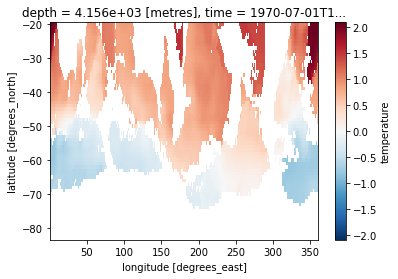

In [4]:
en4[0,37,:,:].plot()

In [5]:
#create depth weigths
en4_dzt=np.diff(en4.depth)
en4_dzt=np.insert(en4_dzt,0,en4.depth[0])

en4_dzt_xr = xr.DataArray(en4_dzt, 
coords={'depth': en4.depth,}, 
dims=["depth"])
en4_dzt_xr.name = "dzt"
en4_dzt_xr

<xarray.DataArray 'dzt' (depth: 42)>
array([  5.0215898,  10.05695  ,  10.08192  ,  10.11783  ,  10.169472 ,
        10.243732 ,  10.350491 ,  10.503929 ,  10.724373 ,  11.040894 ,
        11.494995 ,  12.145721 ,  13.076653 ,  14.405182 ,  16.294724 ,
        18.96901  ,  22.727982 ,  27.960724 ,  35.14795  ,  44.839966 ,
        57.59137  ,  73.83548  ,  93.70126  , 116.82074  , 142.22668  ,
       168.44623  , 193.81006  , 216.8551   , 236.62952  , 252.78015  ,
       265.4464   , 275.0664   , 282.19678  , 287.38574  , 291.11206  ,
       293.7627   , 295.6355   , 296.95166  , 297.87402  , 298.51904  ,
       298.96875  , 299.28223  ], dtype=float32)
Coordinates:
  * depth    (depth) float32 5.022 15.08 25.16 ... 4.752e+03 5.051e+03 5.35e+03

In [6]:
#depth_slice=slice(4000,6000)
depth_slice = slice(4000,None)
print(en4.sel(depth=depth_slice).shape,en4.depth[37:],en4_dzt_xr[37:].shape)

(52, 5, 64, 360) <xarray.DataArray 'depth' (depth: 5)>
array([4155.628 , 4453.502 , 4752.021 , 5050.9897, 5350.272 ], dtype=float32)
Coordinates:
  * depth    (depth) float32 4.156e+03 4.454e+03 4.752e+03 5.051e+03 5.35e+03
Attributes:
    long_name:      depth
    units:          metres
    positive:       down
    standard_name:  depth
    bounds:         depth_bnds (5,)


In [7]:
#calc depth average
EN4_4to6km=(en4.sel(depth=depth_slice)*en4_dzt_xr[37:]).sum(dim='depth')/ en4_dzt_xr[37:].values.sum()
EN4_4to6km.load()

<xarray.DataArray (time: 52, lat: 64, lon: 360)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [1.99309421, 1.99013433, 1.96989425, ..., 1.61051487,
         1.99282959, 1.99258997],
        [1.99131697, 1.99072331, 1.98272981, ..., 1.60842475,
         1.9895985 , 1.98944529],
        [1.9874919 , 1.98825444, 1.98726574, ..., 1.60523475,
         1.98650907, 1.98624701]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [1.99632774, 1.99366649, 1.9729425 , ..., 1.6136168 ,
         1.99592859, 1.9956359 ],
        [1.99418307, 1.99370246, 1.98522322, ..., 1.61135868,
         1.99247946, 1.99220329],
        [1.99002676, 1.99067601, 1.98927074, ..., 1.60805357,
         1.98921679, 1.98879634]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [1.99743934, 1.99285235, 1.97209529, ..., 1.61757658,
         1.99896182, 1.99770133],
        [1.99546667, 1.99315486, 1.98463604, ..., 1.61538144,
         1.99560772, 1.99439324],
        [1.99148523, 1.99041922, 1.98893546, ..., 1.61217558,
         1.99243733, 1.99110961]]])
Coordinates:
  * lat      (lat) float32 -83.0 -82.0 -81.0 -80.0 ... -23.0 -22.0 -21.0 -20.0
  * lon      (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
  * time     (time) datetime64[ns] 1970-07-01T16:58:07.500000256 ... 2021-07-...

In [8]:
#depth_slice=slice(4000,6000)
depth_slice = slice(1000,4000)
print(en4.sel(depth=depth_slice).shape,en4.depth[26:37],en4_dzt_xr[26:37].shape)

(52, 11, 64, 360) <xarray.DataArray 'depth' (depth: 11)>
array([1161.8059, 1378.661 , 1615.2905, 1868.0707, 2133.517 , 2408.5835,
       2690.7803, 2978.166 , 3269.278 , 3563.0408, 3858.6763], dtype=float32)
Coordinates:
  * depth    (depth) float32 1.162e+03 1.379e+03 ... 3.563e+03 3.859e+03
Attributes:
    long_name:      depth
    units:          metres
    positive:       down
    standard_name:  depth
    bounds:         depth_bnds (11,)


In [9]:
EN4_1to4km=(en4.sel(depth=depth_slice)*en4_dzt_xr[26:37]).sum(dim='depth')/ en4_dzt_xr[26:37].values.sum()
EN4_1to4km.load()

<xarray.DataArray (time: 52, lat: 64, lon: 360)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [2.59717218, 2.59510261, 2.59167326, ..., 2.6052392 ,
         2.60270089, 2.59946532],
        [2.6300583 , 2.62806189, 2.62625227, ..., 2.63786263,
         2.63551204, 2.63250455],
        [2.66526732, 2.66296871, 2.66107032, ..., 2.67332522,
         2.6709445 , 2.66789423]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [2.64101981, 2.64631625, 2.64458093, ..., 2.63073819,
         2.63606253, 2.63915106],
        [2.671658  , 2.67624179, 2.67549023, ..., 2.66187866,
         2.66687018, 2.66994188],
        [2.70568278, 2.70778227, 2.70598495, ..., 2.69838454,
         2.70237015, 2.70463641]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [2.65961994, 2.65464339, 2.64880451, ..., 2.65539647,
         2.65997167, 2.66083756],
        [2.69039562, 2.68450773, 2.67935642, ..., 2.6857348 ,
         2.69050195, 2.69162496],
        [2.72166797, 2.71487014, 2.70941416, ..., 2.71908175,
         2.72294728, 2.7233872 ]]])
Coordinates:
  * lat      (lat) float32 -83.0 -82.0 -81.0 -80.0 ... -23.0 -22.0 -21.0 -20.0
  * lon      (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
  * time     (time) datetime64[ns] 1970-07-01T16:58:07.500000256 ... 2021-07-...

In [10]:
#depth_slice=slice(4000,6000)
depth_slice = slice(0,1000)
print(en4.sel(depth=depth_slice).shape,en4.depth[0:26],en4_dzt_xr[0:26].shape)

(52, 26, 64, 360) <xarray.DataArray 'depth' (depth: 26)>
array([  5.02159 ,  15.07854 ,  25.16046 ,  35.27829 ,  45.44776 ,  55.691494,
        66.041985,  76.54591 ,  87.27029 ,  98.31118 , 109.806175, 121.9519  ,
       135.02855 , 149.43373 , 165.72845 , 184.69746 , 207.42545 , 235.38617 ,
       270.53412 , 315.37408 , 372.96545 , 446.80093 , 540.5022  , 657.32294 ,
       799.5496  , 967.99585 ], dtype=float32)
Coordinates:
  * depth    (depth) float32 5.022 15.08 25.16 35.28 ... 540.5 657.3 799.5 968.0
Attributes:
    long_name:      depth
    units:          metres
    positive:       down
    standard_name:  depth
    bounds:         depth_bnds (26,)


In [11]:
EN4_0to1km=(en4.sel(depth=depth_slice)*en4_dzt_xr[0:26]).sum(dim='depth')/ en4_dzt_xr[0:26].values.sum()
EN4_0to1km.load()

<xarray.DataArray (time: 52, lat: 64, lon: 360)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [8.70043041, 8.61563922, 8.54437506, ..., 8.95360817,
         8.86737257, 8.78025401],
        [8.61674424, 8.53515184, 8.46700872, ..., 8.85423302,
         8.77263106, 8.6912291 ],
        [8.54052181, 8.46044488, 8.39469355, ..., 8.76229086,
         8.68694553, 8.61085345]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [8.80263395, 8.7668807 , 8.69187483, ..., 9.11534239,
         8.99563033, 8.87655501],
        [8.7311306 , 8.69768106, 8.62473863, ..., 9.03247984,
         8.91674674, 8.80186351],
        [8.68495961, 8.65438149, 8.58416506, ..., 8.96347827,
         8.85865632, 8.7516667 ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [8.9363802 , 8.78561856, 8.67990272, ..., 9.21941793,
         9.12864317, 9.02727578],
        [8.80882005, 8.7235673 , 8.63674614, ..., 9.05690522,
         8.96966098, 8.87989751],
        [8.72268838, 8.68860794, 8.61666575, ..., 8.93163659,
         8.85374745, 8.77682544]]])
Coordinates:
  * lat      (lat) float32 -83.0 -82.0 -81.0 -80.0 ... -23.0 -22.0 -21.0 -20.0
  * lon      (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
  * time     (time) datetime64[ns] 1970-07-01T16:58:07.500000256 ... 2021-07-...

In [26]:
EN4_1to4km.sel(time=slice('1981-01-01','2015-12-31')).shape

(35, 64, 360)

In [27]:
en4_tr81to15_Tanom_0to1_m=np.zeros((en4.shape[2],en4.shape[3]))
en4_tr81to15_Tanom_0to1_p=np.zeros((en4.shape[2],en4.shape[3]))

en4_tr81to15_Tanom_1to4_m=np.zeros((en4.shape[2],en4.shape[3]))
en4_tr81to15_Tanom_1to4_p=np.zeros((en4.shape[2],en4.shape[3]))

en4_tr81to15_Tanom_4to6_m=np.zeros((en4.shape[2],en4.shape[3]))
en4_tr81to15_Tanom_4to6_p=np.zeros((en4.shape[2],en4.shape[3]))

en4_tr73to80_Tanom_0to1_m=np.zeros((en4.shape[2],en4.shape[3]))
en4_tr73to80_Tanom_0to1_p=np.zeros((en4.shape[2],en4.shape[3]))

en4_tr73to80_Tanom_1to4_m=np.zeros((en4.shape[2],en4.shape[3]))
en4_tr73to80_Tanom_1to4_p=np.zeros((en4.shape[2],en4.shape[3]))

en4_tr73to80_Tanom_4to6_m=np.zeros((en4.shape[2],en4.shape[3]))
en4_tr73to80_Tanom_4to6_p=np.zeros((en4.shape[2],en4.shape[3]))

en4_tr81to00_Tanom_0to1_m=np.zeros((en4.shape[2],en4.shape[3]))
en4_tr81to00_Tanom_0to1_p=np.zeros((en4.shape[2],en4.shape[3]))

en4_tr81to00_Tanom_1to4_m=np.zeros((en4.shape[2],en4.shape[3]))
en4_tr81to00_Tanom_1to4_p=np.zeros((en4.shape[2],en4.shape[3]))

en4_tr81to00_Tanom_4to6_m=np.zeros((en4.shape[2],en4.shape[3]))
en4_tr81to00_Tanom_4to6_p=np.zeros((en4.shape[2],en4.shape[3]))

en4_tr01to15_Tanom_0to1_m=np.zeros((en4.shape[2],en4.shape[3]))
en4_tr01to15_Tanom_0to1_p=np.zeros((en4.shape[2],en4.shape[3]))

en4_tr01to15_Tanom_1to4_m=np.zeros((en4.shape[2],en4.shape[3]))
en4_tr01to15_Tanom_1to4_p=np.zeros((en4.shape[2],en4.shape[3]))

en4_tr01to15_Tanom_4to6_m=np.zeros((en4.shape[2],en4.shape[3]))
en4_tr01to15_Tanom_4to6_p=np.zeros((en4.shape[2],en4.shape[3]))

#.sel(time=slice('1979-01-01','1988-12-31'))

for j in range(0,en4.shape[2]):
    #print(j)
    
    for i in range(0,en4.shape[3]):
        
        tmp=sp.stats.linregress(range(35), EN4_0to1km.sel(time=slice('1981-01-01','2015-12-31'))[:,j,i])
        en4_tr81to15_Tanom_0to1_m[j,i]=tmp.slope
        en4_tr81to15_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(35), EN4_1to4km.sel(time=slice('1981-01-01','2015-12-31'))[:,j,i])
        en4_tr81to15_Tanom_1to4_m[j,i]=tmp.slope
        en4_tr81to15_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(35), EN4_4to6km.sel(time=slice('1981-01-01','2015-12-31'))[:,j,i])
        en4_tr81to15_Tanom_4to6_m[j,i]=tmp.slope
        en4_tr81to15_Tanom_4to6_p[j,i]=tmp.pvalue

        
        tmp=sp.stats.linregress(range(8), EN4_0to1km.sel(time=slice('1973-01-01','1980-12-31'))[:,j,i])
        en4_tr73to80_Tanom_0to1_m[j,i]=tmp.slope
        en4_tr73to80_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(8), EN4_1to4km.sel(time=slice('1973-01-01','1980-12-31'))[:,j,i])
        en4_tr73to80_Tanom_1to4_m[j,i]=tmp.slope
        en4_tr73to80_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(8), EN4_4to6km.sel(time=slice('1973-01-01','1980-12-31'))[:,j,i])
        en4_tr73to80_Tanom_4to6_m[j,i]=tmp.slope
        en4_tr73to80_Tanom_4to6_p[j,i]=tmp.pvalue
        
        
        tmp=sp.stats.linregress(range(20), EN4_0to1km.sel(time=slice('1981-01-01','2000-12-31'))[:,j,i])
        en4_tr81to00_Tanom_0to1_m[j,i]=tmp.slope
        en4_tr81to00_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(20), EN4_1to4km.sel(time=slice('1981-01-01','2000-12-31'))[:,j,i])
        en4_tr81to00_Tanom_1to4_m[j,i]=tmp.slope
        en4_tr81to00_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(20), EN4_4to6km.sel(time=slice('1981-01-01','2000-12-31'))[:,j,i])
        en4_tr81to00_Tanom_4to6_m[j,i]=tmp.slope
        en4_tr81to00_Tanom_4to6_p[j,i]=tmp.pvalue

        
        tmp=sp.stats.linregress(range(15), EN4_0to1km.sel(time=slice('2001-01-01','2015-12-31'))[:,j,i])
        en4_tr01to15_Tanom_0to1_m[j,i]=tmp.slope
        en4_tr01to15_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(15), EN4_1to4km.sel(time=slice('2001-01-01','2015-12-31'))[:,j,i])
        en4_tr01to15_Tanom_1to4_m[j,i]=tmp.slope
        en4_tr01to15_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(15), EN4_4to6km.sel(time=slice('2001-01-01','2015-12-31'))[:,j,i])
        en4_tr01to15_Tanom_4to6_m[j,i]=tmp.slope
        en4_tr01to15_Tanom_4to6_p[j,i]=tmp.pvalue
        

In [28]:
en4_tr01to15_Tanom_4to6_p

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.38576838, 0.40201768, 0.38394141, ..., 0.872572  , 0.28606087,
        0.34747099],
       [0.59271352, 0.48849413, 0.45348633, ..., 0.70395654, 0.75755505,
        0.63863209],
       [0.78175293, 0.57666028, 0.5223237 , ..., 0.62404144, 0.97817142,
        0.88324963]])

In [31]:
#0-1km
tmp = xr.DataArray(en4_tr81to15_Tanom_0to1_m, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr81to15_Tanom_0to1_m.nc')

tmp = xr.DataArray(en4_tr81to15_Tanom_0to1_p, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr81to15_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(en4_tr81to15_Tanom_1to4_m, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr81to15_Tanom_1to4_m.nc')

tmp = xr.DataArray(en4_tr81to15_Tanom_1to4_p, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr81to15_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(en4_tr81to15_Tanom_4to6_m, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr81to15_Tanom_4to6_m.nc')

tmp = xr.DataArray(en4_tr81to15_Tanom_4to6_p, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr81to15_Tanom_4to6_p.nc')

In [32]:
#0-1km
tmp = xr.DataArray(en4_tr73to80_Tanom_0to1_m, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr73to80_Tanom_0to1_m.nc')

tmp = xr.DataArray(en4_tr73to80_Tanom_0to1_p, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr73to80_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(en4_tr73to80_Tanom_1to4_m, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr73to80_Tanom_1to4_m.nc')

tmp = xr.DataArray(en4_tr73to80_Tanom_1to4_p, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr73to80_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(en4_tr73to80_Tanom_4to6_m, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr73to80_Tanom_4to6_m.nc')

tmp = xr.DataArray(en4_tr73to80_Tanom_4to6_p, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr73to80_Tanom_4to6_p.nc')

In [33]:
#0-1km
tmp = xr.DataArray(en4_tr81to00_Tanom_0to1_m, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_0to1_m.nc')

tmp = xr.DataArray(en4_tr81to00_Tanom_0to1_p, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(en4_tr81to00_Tanom_1to4_m, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_1to4_m.nc')

tmp = xr.DataArray(en4_tr81to00_Tanom_1to4_p, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(en4_tr81to00_Tanom_4to6_m, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_4to6_m.nc')

tmp = xr.DataArray(en4_tr81to00_Tanom_4to6_p, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_4to6_p.nc')

In [34]:
#0-1km
tmp = xr.DataArray(en4_tr01to15_Tanom_0to1_m, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_0to1_m.nc')

tmp = xr.DataArray(en4_tr01to15_Tanom_0to1_p, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(en4_tr01to15_Tanom_1to4_m, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_1to4_m.nc')

tmp = xr.DataArray(en4_tr01to15_Tanom_1to4_p, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(en4_tr01to15_Tanom_4to6_m, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_4to6_m.nc')

tmp = xr.DataArray(en4_tr01to15_Tanom_4to6_p, 
coords={'lat':en4.lat ,'lon': en4.lon}, 
dims=["lat", "lon"])
tmp.to_netcdf('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_4to6_p.nc')

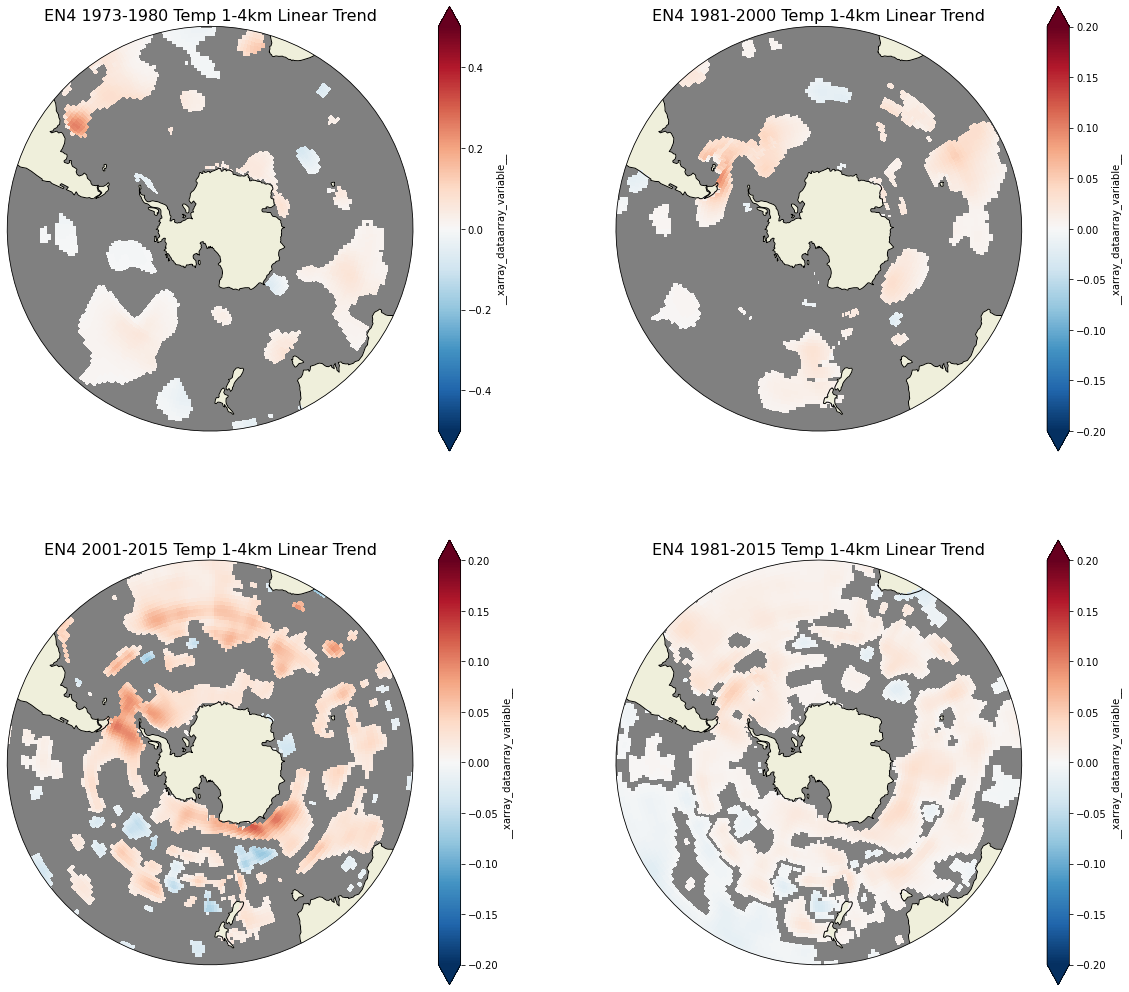

In [47]:
clev = np.arange(-.5,.55,.05)
clev = np.arange(-.2,.22,.02)

v1=-.5
v2=.5

pmax=0.05

fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(2,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr73to80_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr73to80_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='EN4 1973-1980 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


v1=-.2 #C/Decade *10 on load
v2=.2

ax = plt.subplot(2,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='EN4 1981-2000 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


ax = plt.subplot(2,2,3, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='EN4 2001-2015 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

ax = plt.subplot(2,2,4, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to15_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to15_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='EN4 1981-2015 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)



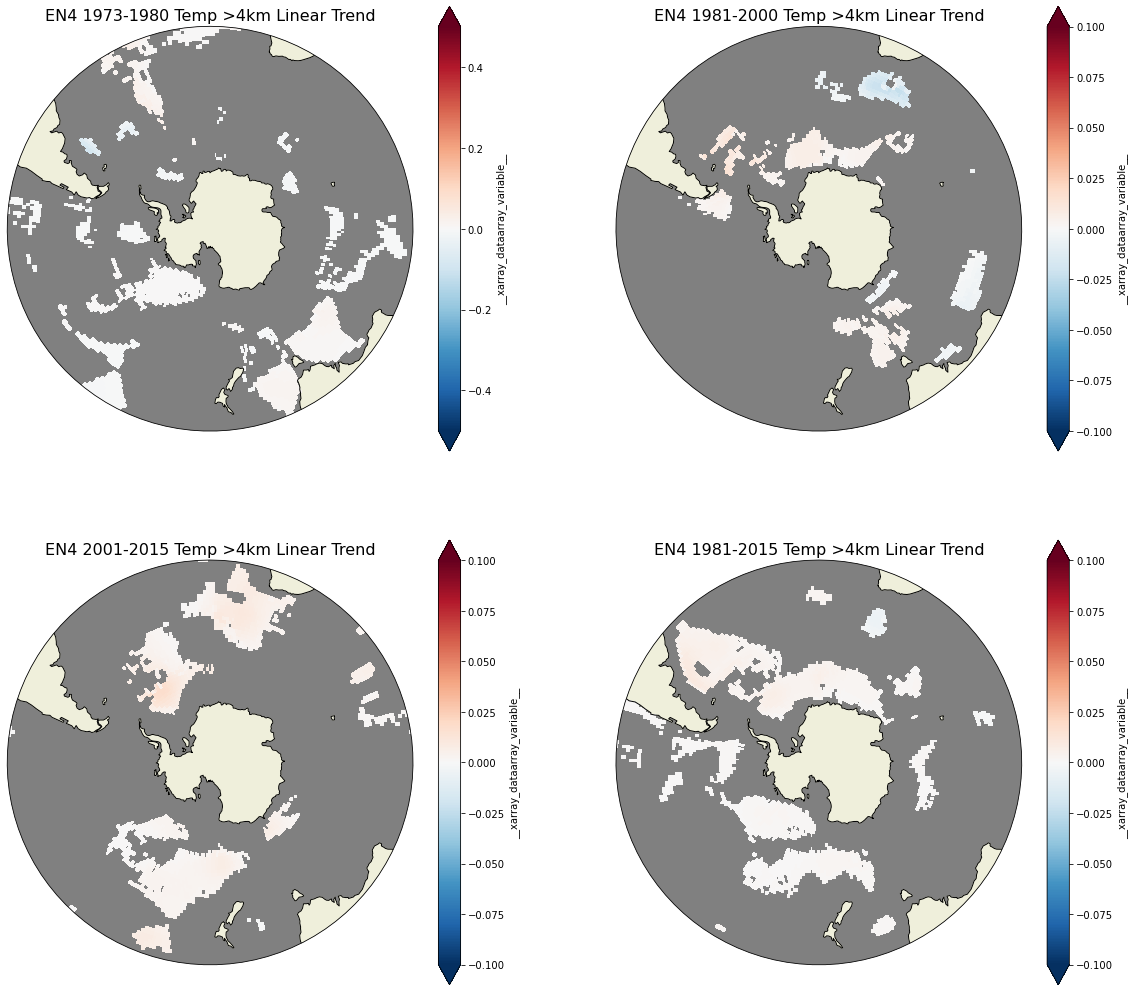

In [48]:
clev = np.arange(-.5,.55,.05)
clev = np.arange(-.2,.22,.02)

v1=-.5
v2=.5
pmax=0.05

fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(2,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr73to80_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr73to80_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='EN4 1973-1980 Temp >4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


v1=-.1 #C/Decade *10 on load
v2=.1

ax = plt.subplot(2,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to00_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='EN4 1981-2000 Temp >4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


ax = plt.subplot(2,2,3, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr01to15_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='EN4 2001-2015 Temp >4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

ax = plt.subplot(2,2,4, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to15_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/jk72/pas561/jnb/EN422/en4_tr81to15_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='lon', y='lat', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='EN4 1981-2015 Temp >4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)



In [5]:
#compare to models - interp 01 to 025 grid for MMM

In [68]:
vgrid_file ='/g/data/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra501-520.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yt_ocean = nc.variables['yt_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
nc.close() # close the file
#print st_ocean.shape
#print potrho.shape
#print yt_ocean.shape

In [69]:
#NP 025
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

of=os.path.join(NYFCntrlDir,'cT_0to1.npy')
np_cT_0to1=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_1to4.npy')
np_cT_1to4=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_2to4.npy')
np_cT_2to4=np.load(of)

of=os.path.join(NYFCntrlDir,'cT_4to6.npy')
np_cT_4to6=np.load(of)  

print(np_cT_0to1.shape)
print(np_cT_1to4.shape)
print(np_cT_4to6.shape)

of=os.path.join(NYFPertDir,'pT_0to1.npy')
np_pT_0to1=np.load(of)

of=os.path.join(NYFPertDir,'pT_1to4.npy')
np_pT_1to4=np.load(of)

of=os.path.join(NYFPertDir,'pT_2to4.npy')
np_pT_2to4=np.load(of)

of=os.path.join(NYFPertDir,'pT_4to6.npy')
np_pT_4to6=np.load(of)  

print(np_pT_0to1.shape)
print(np_pT_1to4.shape)
print(np_pT_4to6.shape)

anom025_0to1=np_pT_0to1[0:43,:,:]-np_cT_0to1[2:45,:,:]
anom025_1to4=np_pT_1to4[0:43,:,:]-np_cT_1to4[2:45,:,:]
anom025_4to6=np_pT_4to6[0:43,:,:]-np_cT_4to6[2:45,:,:]

(49, 1080, 1440)
(49, 1080, 1440)
(49, 1080, 1440)
(44, 1080, 1440)
(44, 1080, 1440)
(44, 1080, 1440)


In [70]:
#MOM01
NYFCntrlDir = '/g/data3/hh5/tmp/pas561/kds75_cp_ann/'
NYFPertDir = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr/'

of1=os.path.join(NYFCntrlDir,'cT_0to1.npy')
of2=os.path.join(NYFCntrlDir,'cT_0to1_141to155.npy')

mom01_cT_0to1=np.concatenate((np.load(of1),np.load(of2)),axis=0)
print(mom01_cT_0to1.shape)

of1=os.path.join(NYFCntrlDir,'cT_1to4.npy')
of2=os.path.join(NYFCntrlDir,'cT_1to4_141to155.npy')
mom01_cT_1to4=np.concatenate((np.load(of1),np.load(of2)),axis=0)
print(mom01_cT_1to4.shape)

of1=os.path.join(NYFCntrlDir,'cT_4to6.npy')
of2=os.path.join(NYFCntrlDir,'cT_4to6_141to155.npy')
mom01_cT_4to6=np.concatenate((np.load(of1),np.load(of2)),axis=0)
print(mom01_cT_4to6.shape)

of1=os.path.join(NYFPertDir,'pT_0to1.npy')
of2=os.path.join(NYFPertDir,'pT_0to1_141to154.npy')

mom01_pT_0to1=np.concatenate((np.load(of1),np.load(of2)),axis=0)
print(mom01_pT_0to1.shape)

of1=os.path.join(NYFPertDir,'pT_1to4.npy')
of2=os.path.join(NYFPertDir,'pT_1to4_141to154.npy')
mom01_pT_1to4=np.concatenate((np.load(of1),np.load(of2)),axis=0)
print(mom01_pT_1to4.shape)

of1=os.path.join(NYFPertDir,'pT_4to6.npy')
of2=os.path.join(NYFPertDir,'pT_4to6_141to154.npy')
mom01_pT_4to6=np.concatenate((np.load(of1),np.load(of2)),axis=0)
print(mom01_pT_4to6.shape)

anom01_0to1=mom01_pT_0to1[:42,:,:]-mom01_cT_0to1[:42,:,:]
anom01_1to4=mom01_pT_1to4[:42,:,:]-mom01_cT_1to4[:42,:,:]
anom01_4to6=mom01_pT_4to6[:42,:,:]-mom01_cT_4to6[:42,:,:]

vgrid_file ='/g/data/hh5/tmp/pas561/kds75_cp_ann/ocean_130.nc'
nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yt_ocean2 = nc.variables['yt_ocean'][0:1351]
xt_ocean2 = nc.variables['xt_ocean'][:]
#potrho = nc.variables['potrho'][:]
nc.close() # close the file

(42, 1351, 3600)
(42, 1351, 3600)
(42, 1351, 3600)
(43, 1351, 3600)
(43, 1351, 3600)
(43, 1351, 3600)


In [71]:
t=np.arange(1973,2015,1)
print(t.shape)

print(anom025_0to1.shape,anom01_0to1.shape)

print(yt_ocean[540],yt_ocean2[1350])

(42,)
(43, 1080, 1440) (42, 1351, 3600)
10.564654234066332 10.490889828041823


In [75]:
#interp 01 to 025 grid and calc mmm anom
tmp025 = xr.DataArray(anom025_0to1[:42,0:540,:], 
coords={'time':t,'yt_ocean':yt_ocean[0:540],'xt_ocean': xt_ocean}, 
dims=["time","yt_ocean", "xt_ocean"])

tmp01 = xr.DataArray(anom01_0to1[:42,:,:], 
coords={'time':t,'yt_ocean':yt_ocean2[:1351] ,'xt_ocean': xt_ocean2}, 
dims=["time","yt_ocean", "xt_ocean"])

anom_01_interp=tmp01.interp(xt_ocean=tmp025.xt_ocean.data, yt_ocean=tmp025.yt_ocean.data)

anom_mmm_0to1=(anom_01_interp+tmp025)/2
anom_mmm_0to1.compute()

#interp 01 to 025 grid
tmp025 = xr.DataArray(anom025_1to4[:42,0:540,:], 
coords={'time':t,'yt_ocean':yt_ocean[0:540],'xt_ocean': xt_ocean}, 
dims=["time","yt_ocean", "xt_ocean"])

tmp01 = xr.DataArray(anom01_1to4[:42,:,:], 
coords={'time':t,'yt_ocean':yt_ocean2[:1351] ,'xt_ocean': xt_ocean2}, 
dims=["time","yt_ocean", "xt_ocean"])

anom_01_interp=tmp01.interp(xt_ocean=tmp025.xt_ocean.data, yt_ocean=tmp025.yt_ocean.data)

anom_mmm_1to4=(anom_01_interp+tmp025)/2
anom_mmm_0to1.compute()

#interp 01 to 025 grid
tmp025 = xr.DataArray(anom025_4to6[:42,0:540,:], 
coords={'time':t,'yt_ocean':yt_ocean[0:540],'xt_ocean': xt_ocean}, 
dims=["time","yt_ocean", "xt_ocean"])

tmp01 = xr.DataArray(anom01_4to6[:42,:,:], 
coords={'time':t,'yt_ocean':yt_ocean2[:1351] ,'xt_ocean': xt_ocean2}, 
dims=["time","yt_ocean", "xt_ocean"])

anom_01_interp=tmp01.interp(xt_ocean=tmp025.xt_ocean.data, yt_ocean=tmp025.yt_ocean.data)

anom_mmm_4to6=(anom_01_interp+tmp025)/2
anom_mmm_0to1.compute()

<xarray.DataArray (time: 42, yt_ocean: 540, xt_ocean: 1440)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,  0.01105429,  0.01689805, ..., -0.01648846,
         -0.01548805, -0.01222984],
        [ 0.00838293, -0.00564503,  0.01791241, ..., -0.01215289,
         -0.00720799, -0.0029661 ],
        [ 0.00734391, -0.00770956,  0.03508401, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan, -0.01115195, -0.02476021, ...,  0.01922599,
          0.03023061,  0.03038717],
        [ 0.05692085, -0.00505126, -0.10830028, ...,  0.00851449,
          0.02730153,  0.04622593],
        [ 0.0678948 , -0.11303224, -0.08481984, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan, -0.04121189, -0.0300972 , ..., -0.06101471,
         -0.06421463, -0.04926182],
        [-0.05617482, -0.05971142, -0.06325611, ..., -0.05185966,
         -0.05862767, -0.06157154],
        [-0.0646352 , -0.10519328, -0.00671123, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time      (time) int64 1973 1974 1975 1976 1977 ... 2010 2011 2012 2013 2014
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean  (yt_ocean) float64 -81.08 -80.97 -80.87 ... 9.827 10.07 10.32

In [76]:
#calc MMM m and p vals
mmm_tr81to00_Tanom_0to1_m=np.zeros((500,1440))
mmm_tr81to00_Tanom_0to1_p=np.zeros((500,1440))

mmm_tr81to00_Tanom_1to4_m=np.zeros((500,1440))
mmm_tr81to00_Tanom_1to4_p=np.zeros((500,1440))

mmm_tr81to00_Tanom_4to6_m=np.zeros((500,1440))
mmm_tr81to00_Tanom_4to6_p=np.zeros((500,1440))

mmm_tr01to15_Tanom_0to1_m=np.zeros((500,1440))
mmm_tr01to15_Tanom_0to1_p=np.zeros((500,1440))

mmm_tr01to15_Tanom_1to4_m=np.zeros((500,1440))
mmm_tr01to15_Tanom_1to4_p=np.zeros((500,1440))

mmm_tr01to15_Tanom_4to6_m=np.zeros((500,1440))
mmm_tr01to15_Tanom_4to6_p=np.zeros((500,1440))


for j in range(0,500):
    #print(j)
    
    for i in range(0,1440):
        
        tmp=sp.stats.linregress(range(20), anom_mmm_0to1[8:28,j,i])
        mmm_tr81to00_Tanom_0to1_m[j,i]=tmp.slope
        mmm_tr81to00_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(20), anom_mmm_1to4[8:28,j,i])
        mmm_tr81to00_Tanom_1to4_m[j,i]=tmp.slope
        mmm_tr81to00_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(20), anom_mmm_4to6[8:28,j,i])
        mmm_tr81to00_Tanom_4to6_m[j,i]=tmp.slope
        mmm_tr81to00_Tanom_4to6_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(14), anom_mmm_0to1[28:42,j,i])
        mmm_tr01to15_Tanom_0to1_m[j,i]=tmp.slope
        mmm_tr01to15_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(14), anom_mmm_1to4[28:42,j,i])
        mmm_tr01to15_Tanom_1to4_m[j,i]=tmp.slope
        mmm_tr01to15_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(14), anom_mmm_4to6[28:42,j,i])
        mmm_tr01to15_Tanom_4to6_m[j,i]=tmp.slope
        mmm_tr01to15_Tanom_4to6_p[j,i]=tmp.pvalue


In [77]:
#81to00
#0-1km
tmp = xr.DataArray(mmm_tr81to00_Tanom_0to1_m, 
coords={'yt_ocean':yt_ocean[:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr81to00__Tanom_0to1_m.nc')

tmp = xr.DataArray(mmm_tr81to00_Tanom_0to1_p, 
coords={'yt_ocean':yt_ocean[:500],'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr81to00__Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(mmm_tr81to00_Tanom_1to4_m, 
coords={'yt_ocean':yt_ocean[:500],'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr81to00__Tanom_1to4_m.nc')

tmp = xr.DataArray(mmm_tr81to00_Tanom_1to4_p, 
coords={'yt_ocean':yt_ocean[:500],'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr81to00__Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(mmm_tr81to00_Tanom_4to6_m, 
coords={'yt_ocean':yt_ocean[:500],'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr81to00__Tanom_4to6_m.nc')

tmp = xr.DataArray(mmm_tr81to00_Tanom_4to6_p, 
coords={'yt_ocean':yt_ocean[:500],'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr81to00__Tanom_4to6_p.nc')

In [78]:
#01to15
#0-1km
tmp = xr.DataArray(mmm_tr01to15_Tanom_0to1_m, 
coords={'yt_ocean':yt_ocean[:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr01to15__Tanom_0to1_m.nc')

tmp = xr.DataArray(mmm_tr01to15_Tanom_0to1_p, 
coords={'yt_ocean':yt_ocean[:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr01to15__Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(mmm_tr01to15_Tanom_1to4_m, 
coords={'yt_ocean':yt_ocean[:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr01to15__Tanom_1to4_m.nc')

tmp = xr.DataArray(mmm_tr01to15_Tanom_1to4_p, 
coords={'yt_ocean':yt_ocean[:500] ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr01to15__Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(mmm_tr01to15_Tanom_4to6_m, 
coords={'yt_ocean':yt_ocean[:500],'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr01to15__Tanom_4to6_m.nc')

tmp = xr.DataArray(mmm_tr01to15_Tanom_4to6_p, 
coords={'yt_ocean':yt_ocean[:500],'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/mmm_tr01to15__Tanom_4to6_p.nc')

In [56]:
np.arange(1981,2000,1)

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999])

In [57]:
#calc dT/dt
cyrs=np.arange(1971,2017,1)
pyrs=np.arange(1973,2017,1)

#calc linear trend in C/s since 1981-2000 (8 years from 1973) 
#calc linear trend in C/s since 1981-2000 (8 years from 1973) 
print(cyrs[10:45],cyrs[10:45].shape)
print(pyrs[8:43],pyrs[8:43].shape)

print(cyrs[10:29],cyrs[10:29].shape)
print(pyrs[8:27],pyrs[8:27].shape)

print(cyrs[29:45],cyrs[29:45].shape)
print(pyrs[27:43],pyrs[27:43].shape)


[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015] (35,)
[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015] (35,)
[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999] (19,)
[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999] (19,)
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015] (16,)
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015] (16,)


In [58]:
vgrid_file ='/g/data/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra501-520.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yt_ocean = nc.variables['yt_ocean'][0:500]
xt_ocean = nc.variables['xt_ocean'][:]
nc.close() # close the file
#print st_ocean.shape
#print potrho.shape
#print yt_ocean.shape

In [59]:
np_tr81to90_Tanom_0to1_m=np.zeros((500,1440))
np_tr81to90_Tanom_0to1_p=np.zeros((500,1440))

np_tr81to90_Tanom_1to4_m=np.zeros((500,1440))
np_tr81to90_Tanom_1to4_p=np.zeros((500,1440))

np_tr81to90_Tanom_4to6_m=np.zeros((500,1440))
np_tr81to90_Tanom_4to6_p=np.zeros((500,1440))

np_tr91to00_Tanom_0to1_m=np.zeros((500,1440))
np_tr91to00_Tanom_0to1_p=np.zeros((500,1440))

np_tr91to00_Tanom_1to4_m=np.zeros((500,1440))
np_tr91to00_Tanom_1to4_p=np.zeros((500,1440))

np_tr91to00_Tanom_4to6_m=np.zeros((500,1440))
np_tr91to00_Tanom_4to6_p=np.zeros((500,1440))

anom_0to1=np_pT_0to1[0:43,:,:]-np_cT_0to1[2:45,:,:]
anom_1to4=np_pT_1to4[0:43,:,:]-np_cT_1to4[2:45,:,:]
anom_4to6=np_pT_4to6[0:43,:,:]-np_cT_4to6[2:45,:,:]

for j in range(0,500):
    #print(j)
    
    for i in range(0,1440):
        
        tmp=sp.stats.linregress(range(10), anom_0to1[8:18,j,i])
        np_tr81to90_Tanom_0to1_m[j,i]=tmp.slope
        np_tr81to90_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(10), anom_1to4[8:18,j,i])
        np_tr81to90_Tanom_1to4_m[j,i]=tmp.slope
        np_tr81to90_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(10), anom_4to6[8:18,j,i])
        np_tr81to90_Tanom_4to6_m[j,i]=tmp.slope
        np_tr81to90_Tanom_4to6_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(10), anom_0to1[18:28,j,i])
        np_tr91to00_Tanom_0to1_m[j,i]=tmp.slope
        np_tr91to00_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(10), anom_1to4[18:28,j,i])
        np_tr91to00_Tanom_1to4_m[j,i]=tmp.slope
        np_tr91to00_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(10), anom_4to6[18:28,j,i])
        np_tr91to00_Tanom_4to6_m[j,i]=tmp.slope
        np_tr91to00_Tanom_4to6_p[j,i]=tmp.pvalue
        


In [60]:
#0-1km
tmp = xr.DataArray(np_tr81to90_Tanom_0to1_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to90_Tanom_0to1_m.nc')

tmp = xr.DataArray(np_tr81to90_Tanom_0to1_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to90_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(np_tr81to90_Tanom_1to4_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to90_Tanom_1to4_m.nc')

tmp = xr.DataArray(np_tr81to90_Tanom_1to4_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to90_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(np_tr81to90_Tanom_4to6_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to90_Tanom_4to6_m.nc')

tmp = xr.DataArray(np_tr81to90_Tanom_4to6_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to90_Tanom_4to6_p.nc')

In [62]:
#0-1km
tmp = xr.DataArray(np_tr91to00_Tanom_0to1_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr91to00_Tanom_0to1_m.nc')

tmp = xr.DataArray(np_tr91to00_Tanom_0to1_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr91to00_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(np_tr91to00_Tanom_1to4_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr91to00_Tanom_1to4_m.nc')

tmp = xr.DataArray(np_tr91to00_Tanom_1to4_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr91to00_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(np_tr91to00_Tanom_4to6_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr91to00_Tanom_4to6_m.nc')

tmp = xr.DataArray(np_tr91to00_Tanom_4to6_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr91to00_Tanom_4to6_p.nc')

In [72]:
np_tr81to15_Tanom_0to1_m=np.zeros((500,1440))
np_tr81to15_Tanom_0to1_p=np.zeros((500,1440))

np_tr81to15_Tanom_1to4_m=np.zeros((500,1440))
np_tr81to15_Tanom_1to4_p=np.zeros((500,1440))

np_tr81to15_Tanom_4to6_m=np.zeros((500,1440))
np_tr81to15_Tanom_4to6_p=np.zeros((500,1440))

np_tr73to80_Tanom_0to1_m=np.zeros((500,1440))
np_tr73to80_Tanom_0to1_p=np.zeros((500,1440))

np_tr73to80_Tanom_1to4_m=np.zeros((500,1440))
np_tr73to80_Tanom_1to4_p=np.zeros((500,1440))

np_tr73to80_Tanom_4to6_m=np.zeros((500,1440))
np_tr73to80_Tanom_4to6_p=np.zeros((500,1440))

np_tr81to00_Tanom_0to1_m=np.zeros((500,1440))
np_tr81to00_Tanom_0to1_p=np.zeros((500,1440))

np_tr81to00_Tanom_1to4_m=np.zeros((500,1440))
np_tr81to00_Tanom_1to4_p=np.zeros((500,1440))

np_tr81to00_Tanom_4to6_m=np.zeros((500,1440))
np_tr81to00_Tanom_4to6_p=np.zeros((500,1440))

np_tr01to15_Tanom_0to1_m=np.zeros((500,1440))
np_tr01to15_Tanom_0to1_p=np.zeros((500,1440))

np_tr01to15_Tanom_1to4_m=np.zeros((500,1440))
np_tr01to15_Tanom_1to4_p=np.zeros((500,1440))

np_tr01to15_Tanom_4to6_m=np.zeros((500,1440))
np_tr01to15_Tanom_4to6_p=np.zeros((500,1440))

anom_0to1=np_pT_0to1[0:43,:,:]-np_cT_0to1[2:45,:,:]
anom_1to4=np_pT_1to4[0:43,:,:]-np_cT_1to4[2:45,:,:]
anom_4to6=np_pT_4to6[0:43,:,:]-np_cT_4to6[2:45,:,:]

for j in range(0,500):
    #print(j)
    
    for i in range(0,1440):
        
        tmp=sp.stats.linregress(range(35), anom_0to1[8:43,j,i])
        np_tr81to15_Tanom_0to1_m[j,i]=tmp.slope
        np_tr81to15_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(35), anom_1to4[8:43,j,i])
        np_tr81to15_Tanom_1to4_m[j,i]=tmp.slope
        np_tr81to15_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(35), anom_4to6[8:43,j,i])
        np_tr81to15_Tanom_4to6_m[j,i]=tmp.slope
        np_tr81to15_Tanom_4to6_p[j,i]=tmp.pvalue

        
        tmp=sp.stats.linregress(range(8), anom_0to1[0:8,j,i])
        np_tr73to80_Tanom_0to1_m[j,i]=tmp.slope
        np_tr73to80_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(8), anom_1to4[0:8,j,i])
        np_tr73to80_Tanom_1to4_m[j,i]=tmp.slope
        np_tr73to80_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(8), anom_4to6[0:8,j,i])
        np_tr73to80_Tanom_4to6_m[j,i]=tmp.slope
        np_tr73to80_Tanom_4to6_p[j,i]=tmp.pvalue
        
        
        tmp=sp.stats.linregress(range(20), anom_0to1[8:28,j,i])
        np_tr81to00_Tanom_0to1_m[j,i]=tmp.slope
        np_tr81to00_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(20), anom_1to4[8:28,j,i])
        np_tr81to00_Tanom_1to4_m[j,i]=tmp.slope
        np_tr81to00_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(20), anom_4to6[8:28,j,i])
        np_tr81to00_Tanom_4to6_m[j,i]=tmp.slope
        np_tr81to00_Tanom_4to6_p[j,i]=tmp.pvalue

        
        tmp=sp.stats.linregress(range(15), anom_0to1[28:43,j,i])
        np_tr01to15_Tanom_0to1_m[j,i]=tmp.slope
        np_tr01to15_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(15), anom_1to4[28:43,j,i])
        np_tr01to15_Tanom_1to4_m[j,i]=tmp.slope
        np_tr01to15_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(15), anom_4to6[28:43,j,i])
        np_tr01to15_Tanom_4to6_m[j,i]=tmp.slope
        np_tr01to15_Tanom_4to6_p[j,i]=tmp.pvalue
        

In [74]:
#0-1km
tmp = xr.DataArray(np_tr81to15_Tanom_0to1_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to15_Tanom_0to1_m.nc')

tmp = xr.DataArray(np_tr81to15_Tanom_0to1_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to15_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(np_tr81to15_Tanom_1to4_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to15_Tanom_1to4_m.nc')

tmp = xr.DataArray(np_tr81to15_Tanom_1to4_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to15_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(np_tr81to15_Tanom_4to6_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to15_Tanom_4to6_m.nc')

tmp = xr.DataArray(np_tr81to15_Tanom_4to6_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to15_Tanom_4to6_p.nc')

In [75]:
#0-1km
tmp = xr.DataArray(np_tr73to80_Tanom_0to1_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr73to80_Tanom_0to1_m.nc')

tmp = xr.DataArray(np_tr73to80_Tanom_0to1_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr73to80_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(np_tr73to80_Tanom_1to4_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr73to80_Tanom_1to4_m.nc')

tmp = xr.DataArray(np_tr73to80_Tanom_1to4_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr73to80_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(np_tr73to80_Tanom_4to6_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr73to80_Tanom_4to6_m.nc')

tmp = xr.DataArray(np_tr73to80_Tanom_4to6_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr73to80_Tanom_4to6_p.nc')

In [76]:
#0-1km
tmp = xr.DataArray(np_tr81to00_Tanom_0to1_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_0to1_m.nc')

tmp = xr.DataArray(np_tr81to00_Tanom_0to1_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(np_tr81to00_Tanom_1to4_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_1to4_m.nc')

tmp = xr.DataArray(np_tr81to00_Tanom_1to4_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(np_tr81to00_Tanom_4to6_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_4to6_m.nc')

tmp = xr.DataArray(np_tr81to00_Tanom_4to6_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_4to6_p.nc')

In [77]:
#0-1km
tmp = xr.DataArray(np_tr01to15_Tanom_0to1_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr01to15_Tanom_0to1_m.nc')

tmp = xr.DataArray(np_tr01to15_Tanom_0to1_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr01to15_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(np_tr01to15_Tanom_1to4_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr01to15_Tanom_1to4_m.nc')

tmp = xr.DataArray(np_tr01to15_Tanom_1to4_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr01to15_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(np_tr01to15_Tanom_4to6_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr01to15_Tanom_4to6_m.nc')

tmp = xr.DataArray(np_tr01to15_Tanom_4to6_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr01to15_Tanom_4to6_p.nc')

In [81]:
m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr73to80_Tanom_0to1_m.nc')
m.__xarray_dataarray_variable__

<xarray.DataArray '__xarray_dataarray_variable__' (yt_ocean: 500, xt_ocean: 1440)>
[720000 values with dtype=float64]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -81.08 -80.97 -80.87 ... -0.125 0.125 0.375
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88

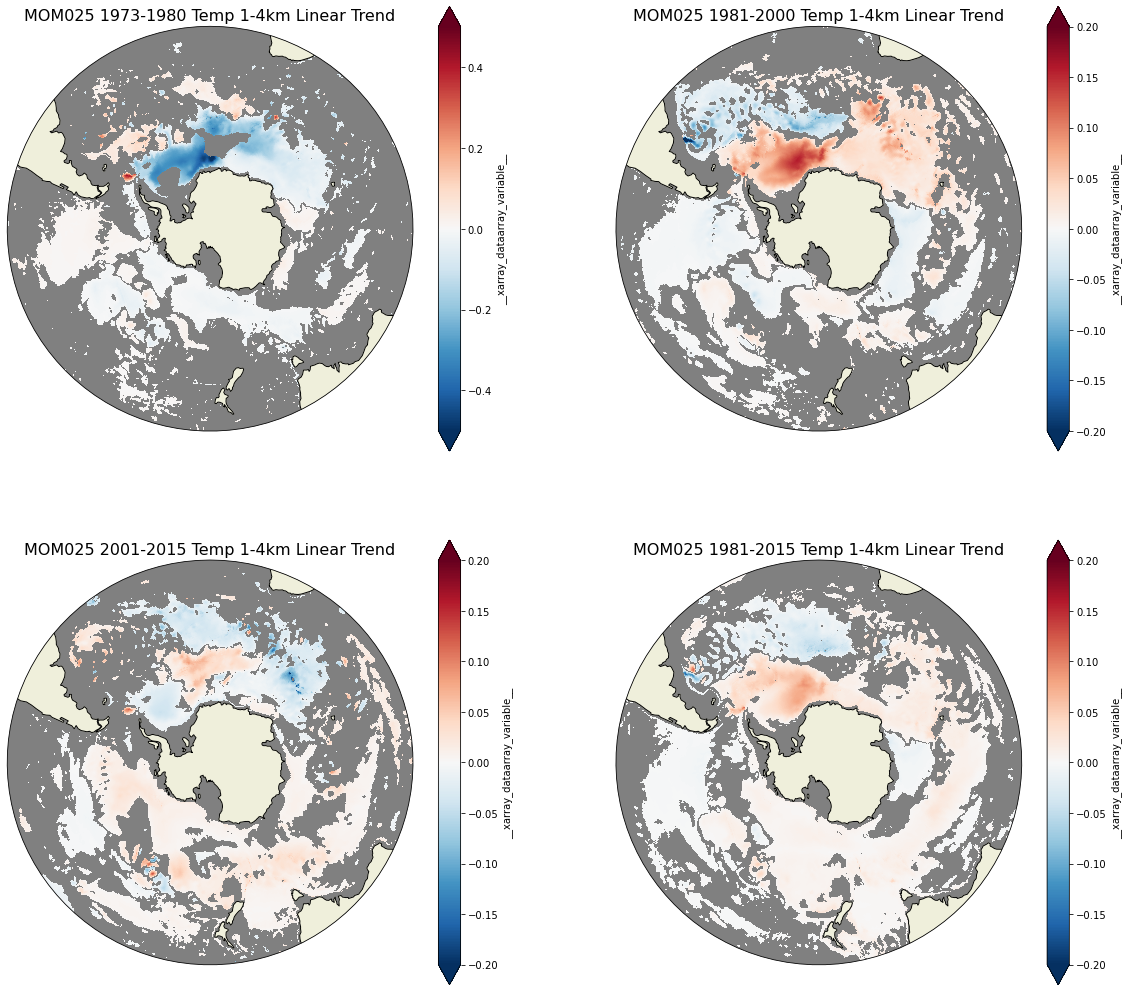

In [49]:
clev = np.arange(-.5,.55,.05)
clev = np.arange(-.2,.22,.02)

v1=-.5
v2=.5
pmax=0.05

fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(2,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr73to80_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr73to80_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM025 1973-1980 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


v1=-.2 #C/Decade *10 on load
v2=.2

ax = plt.subplot(2,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM025 1981-2000 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


ax = plt.subplot(2,2,3, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr01to15_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr01to15_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM025 2001-2015 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

ax = plt.subplot(2,2,4, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to15_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to15_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM025 1981-2015 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)



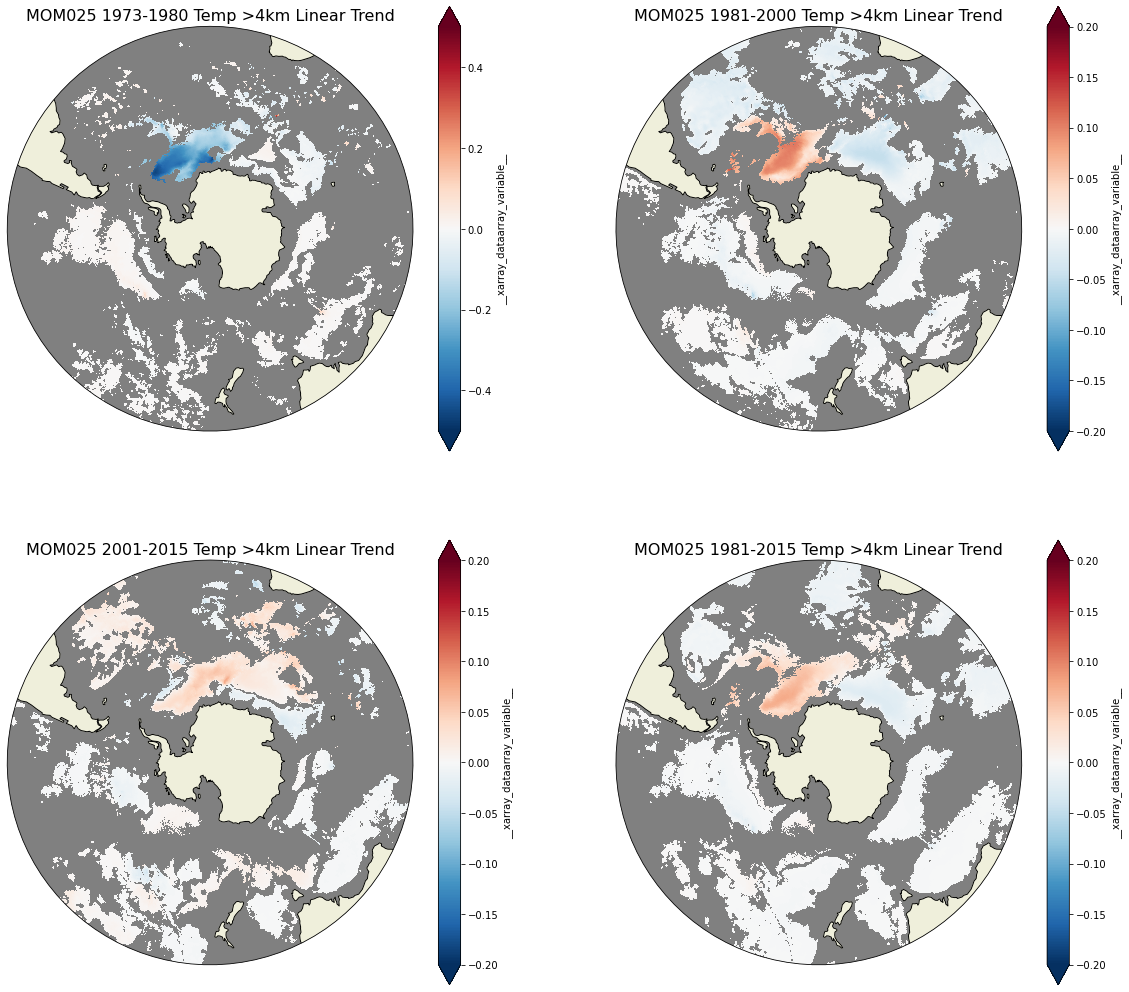

In [50]:
clev = np.arange(-.5,.55,.05)
clev = np.arange(-.2,.22,.02)

v1=-.5
v2=.5

pmax=0.05

fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(2,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr73to80_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr73to80_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM025 1973-1980 Temp >4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


v1=-.2 #C/Decade *10 on load
v2=.2

ax = plt.subplot(2,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to00_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM025 1981-2000 Temp >4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


ax = plt.subplot(2,2,3, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr01to15_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr01to15_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM025 2001-2015 Temp >4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

ax = plt.subplot(2,2,4, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to15_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/np_tr81to15_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM025 1981-2015 Temp >4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)



In [89]:
#Do MOM01 Now

In [63]:
NYFCntrlDir = '/g/data3/hh5/tmp/pas561/kds75_cp_ann/'
NYFPertDir = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr/'

of1=os.path.join(NYFCntrlDir,'cT_0to1.npy')
of2=os.path.join(NYFCntrlDir,'cT_0to1_141to155.npy')

mom01_cT_0to1=np.concatenate((np.load(of1),np.load(of2)),axis=0)
print(mom01_cT_0to1.shape)

of1=os.path.join(NYFCntrlDir,'cT_1to4.npy')
of2=os.path.join(NYFCntrlDir,'cT_1to4_141to155.npy')
mom01_cT_1to4=np.concatenate((np.load(of1),np.load(of2)),axis=0)
print(mom01_cT_1to4.shape)

of1=os.path.join(NYFCntrlDir,'cT_4to6.npy')
of2=os.path.join(NYFCntrlDir,'cT_4to6_141to155.npy')
mom01_cT_4to6=np.concatenate((np.load(of1),np.load(of2)),axis=0)
print(mom01_cT_4to6.shape)

(42, 1351, 3600)
(42, 1351, 3600)
(42, 1351, 3600)


In [64]:
of1=os.path.join(NYFPertDir,'pT_0to1.npy')
of2=os.path.join(NYFPertDir,'pT_0to1_141to154.npy')

mom01_pT_0to1=np.concatenate((np.load(of1),np.load(of2)),axis=0)
print(mom01_pT_0to1.shape)

of1=os.path.join(NYFPertDir,'pT_1to4.npy')
of2=os.path.join(NYFPertDir,'pT_1to4_141to154.npy')
mom01_pT_1to4=np.concatenate((np.load(of1),np.load(of2)),axis=0)
print(mom01_pT_1to4.shape)

of1=os.path.join(NYFPertDir,'pT_4to6.npy')
of2=os.path.join(NYFPertDir,'pT_4to6_141to154.npy')
mom01_pT_4to6=np.concatenate((np.load(of1),np.load(of2)),axis=0)
print(mom01_pT_4to6.shape)

(43, 1351, 3600)
(43, 1351, 3600)
(43, 1351, 3600)


In [65]:
NYFCntrlDir = '/g/data/hh5/tmp/pas561/kds75_cp_ann/'
NYFPertDir = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr/'

vgrid_file ='/g/data/hh5/tmp/pas561/kds75_cp_ann/ocean_130.nc'
nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yt_ocean = nc.variables['yt_ocean'][0:1351]
xt_ocean = nc.variables['xt_ocean'][:]
#potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print potrho.shape
#print yu_ocean.shape

In [66]:
mom01_tr81to90_Tanom_0to1_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr81to90_Tanom_0to1_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr81to90_Tanom_1to4_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr81to90_Tanom_1to4_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr81to90_Tanom_4to6_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr81to90_Tanom_4to6_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr91to00_Tanom_0to1_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr91to00_Tanom_0to1_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr91to00_Tanom_1to4_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr91to00_Tanom_1to4_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr91to00_Tanom_4to6_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr91to00_Tanom_4to6_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

anom_0to1=mom01_pT_0to1[:42,:,:]-mom01_cT_0to1[:42,:,:]
anom_1to4=mom01_pT_1to4[:42,:,:]-mom01_cT_1to4[:42,:,:]
anom_4to6=mom01_pT_4to6[:42,:,:]-mom01_cT_4to6[:42,:,:]

for j in range(0,mom01_pT_1to4.shape[1]):
    #print(j)
    
    for i in range(0,mom01_pT_1to4.shape[2]):
        
        tmp=sp.stats.linregress(range(10), anom_0to1[8:18,j,i])
        mom01_tr81to90_Tanom_0to1_m[j,i]=tmp.slope
        mom01_tr81to90_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(10), anom_1to4[8:18,j,i])
        mom01_tr81to90_Tanom_1to4_m[j,i]=tmp.slope
        mom01_tr81to90_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(10), anom_4to6[8:18,j,i])
        mom01_tr81to90_Tanom_4to6_m[j,i]=tmp.slope
        mom01_tr81to90_Tanom_4to6_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(10), anom_0to1[18:28,j,i])
        mom01_tr91to00_Tanom_0to1_m[j,i]=tmp.slope
        mom01_tr91to00_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(10), anom_1to4[18:28,j,i])
        mom01_tr91to00_Tanom_1to4_m[j,i]=tmp.slope
        mom01_tr91to00_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(10), anom_4to6[18:28,j,i])
        mom01_tr91to00_Tanom_4to6_m[j,i]=tmp.slope
        mom01_tr91to00_Tanom_4to6_p[j,i]=tmp.pvalue
        


In [67]:
#0-1km
tmp = xr.DataArray(mom01_tr81to90_Tanom_0to1_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to90_Tanom_0to1_m.nc')

tmp = xr.DataArray(mom01_tr81to90_Tanom_0to1_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to90_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(mom01_tr81to90_Tanom_1to4_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to90_Tanom_1to4_m.nc')

tmp = xr.DataArray(mom01_tr81to90_Tanom_1to4_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to90_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(mom01_tr81to90_Tanom_4to6_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to90_Tanom_4to6_m.nc')

tmp = xr.DataArray(mom01_tr81to90_Tanom_4to6_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to90_Tanom_4to6_p.nc')

In [68]:
#0-1km
tmp = xr.DataArray(mom01_tr91to00_Tanom_0to1_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr91to00_Tanom_0to1_m.nc')

tmp = xr.DataArray(mom01_tr91to00_Tanom_0to1_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr91to00_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(mom01_tr91to00_Tanom_1to4_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr91to00_Tanom_1to4_m.nc')

tmp = xr.DataArray(mom01_tr91to00_Tanom_1to4_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr91to00_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(mom01_tr91to00_Tanom_4to6_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr91to00_Tanom_4to6_m.nc')

tmp = xr.DataArray(mom01_tr91to00_Tanom_4to6_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr91to00_Tanom_4to6_p.nc')

Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/distributed/process.py", line 188, in _run
    target(*args, **kwargs)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/distributed/nanny.py", line 981, in _run
    asyncio.run(run())
  File "/g/data/hh5/public/apps/mini

In [8]:
mom01_tr81to15_Tanom_0to1_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr81to15_Tanom_0to1_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr81to15_Tanom_1to4_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr81to15_Tanom_1to4_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr81to15_Tanom_4to6_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr81to15_Tanom_4to6_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr73to80_Tanom_0to1_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr73to80_Tanom_0to1_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr73to80_Tanom_1to4_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr73to80_Tanom_1to4_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr73to80_Tanom_4to6_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr73to80_Tanom_4to6_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr81to00_Tanom_0to1_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr81to00_Tanom_0to1_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr81to00_Tanom_1to4_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr81to00_Tanom_1to4_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr81to00_Tanom_4to6_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr81to00_Tanom_4to6_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr01to15_Tanom_0to1_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr01to15_Tanom_0to1_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr01to15_Tanom_1to4_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr01to15_Tanom_1to4_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

mom01_tr01to15_Tanom_4to6_m=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))
mom01_tr01to15_Tanom_4to6_p=np.zeros((mom01_pT_1to4.shape[1],mom01_pT_1to4.shape[2]))

anom_0to1=mom01_pT_0to1[:42,:,:]-mom01_cT_0to1[:42,:,:]
anom_1to4=mom01_pT_1to4[:42,:,:]-mom01_cT_1to4[:42,:,:]
anom_4to6=mom01_pT_4to6[:42,:,:]-mom01_cT_4to6[:42,:,:]

for j in range(0,mom01_pT_1to4.shape[1]):
    #print(j)
    
    for i in range(0,mom01_pT_1to4.shape[2]):
        
        tmp=sp.stats.linregress(range(34), anom_0to1[8:42,j,i])
        mom01_tr81to15_Tanom_0to1_m[j,i]=tmp.slope
        mom01_tr81to15_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(34), anom_1to4[8:42,j,i])
        mom01_tr81to15_Tanom_1to4_m[j,i]=tmp.slope
        mom01_tr81to15_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(34), anom_4to6[8:42,j,i])
        mom01_tr81to15_Tanom_4to6_m[j,i]=tmp.slope
        mom01_tr81to15_Tanom_4to6_p[j,i]=tmp.pvalue

        
        tmp=sp.stats.linregress(range(8), anom_0to1[0:8,j,i])
        mom01_tr73to80_Tanom_0to1_m[j,i]=tmp.slope
        mom01_tr73to80_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(8), anom_1to4[0:8,j,i])
        mom01_tr73to80_Tanom_1to4_m[j,i]=tmp.slope
        mom01_tr73to80_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(8), anom_4to6[0:8,j,i])
        mom01_tr73to80_Tanom_4to6_m[j,i]=tmp.slope
        mom01_tr73to80_Tanom_4to6_p[j,i]=tmp.pvalue
        
        
        tmp=sp.stats.linregress(range(20), anom_0to1[8:28,j,i])
        mom01_tr81to00_Tanom_0to1_m[j,i]=tmp.slope
        mom01_tr81to00_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(20), anom_1to4[8:28,j,i])
        mom01_tr81to00_Tanom_1to4_m[j,i]=tmp.slope
        mom01_tr81to00_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(20), anom_4to6[8:28,j,i])
        mom01_tr81to00_Tanom_4to6_m[j,i]=tmp.slope
        mom01_tr81to00_Tanom_4to6_p[j,i]=tmp.pvalue

        
        tmp=sp.stats.linregress(range(14), anom_0to1[28:42,j,i])
        mom01_tr01to15_Tanom_0to1_m[j,i]=tmp.slope
        mom01_tr01to15_Tanom_0to1_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(14), anom_1to4[28:42,j,i])
        mom01_tr01to15_Tanom_1to4_m[j,i]=tmp.slope
        mom01_tr01to15_Tanom_1to4_p[j,i]=tmp.pvalue

        tmp=sp.stats.linregress(range(14), anom_4to6[28:42,j,i])
        mom01_tr01to15_Tanom_4to6_m[j,i]=tmp.slope
        mom01_tr01to15_Tanom_4to6_p[j,i]=tmp.pvalue
        

In [10]:
#0-1km
tmp = xr.DataArray(mom01_tr81to15_Tanom_0to1_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to15_Tanom_0to1_m.nc')

tmp = xr.DataArray(mom01_tr81to15_Tanom_0to1_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to15_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(mom01_tr81to15_Tanom_1to4_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to15_Tanom_1to4_m.nc')

tmp = xr.DataArray(mom01_tr81to15_Tanom_1to4_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to15_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(mom01_tr81to15_Tanom_4to6_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to15_Tanom_4to6_m.nc')

tmp = xr.DataArray(mom01_tr81to15_Tanom_4to6_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to15_Tanom_4to6_p.nc')

In [11]:
#0-1km
tmp = xr.DataArray(mom01_tr73to80_Tanom_0to1_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr73to80_Tanom_0to1_m.nc')

tmp = xr.DataArray(mom01_tr73to80_Tanom_0to1_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr73to80_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(mom01_tr73to80_Tanom_1to4_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr73to80_Tanom_1to4_m.nc')

tmp = xr.DataArray(mom01_tr73to80_Tanom_1to4_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr73to80_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(mom01_tr73to80_Tanom_4to6_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr73to80_Tanom_4to6_m.nc')

tmp = xr.DataArray(mom01_tr73to80_Tanom_4to6_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr73to80_Tanom_4to6_p.nc')

In [12]:
#0-1km
tmp = xr.DataArray(mom01_tr81to00_Tanom_0to1_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to00_Tanom_0to1_m.nc')

tmp = xr.DataArray(mom01_tr81to00_Tanom_0to1_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to00_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(mom01_tr81to00_Tanom_1to4_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to00_Tanom_1to4_m.nc')

tmp = xr.DataArray(mom01_tr81to00_Tanom_1to4_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to00_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(mom01_tr81to00_Tanom_4to6_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to00_Tanom_4to6_m.nc')

tmp = xr.DataArray(mom01_tr81to00_Tanom_4to6_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to00_Tanom_4to6_p.nc')

In [13]:
#0-1km
tmp = xr.DataArray(mom01_tr01to15_Tanom_0to1_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr01to15_Tanom_0to1_m.nc')

tmp = xr.DataArray(mom01_tr01to15_Tanom_0to1_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr01to15_Tanom_0to1_p.nc')

#1-4km
tmp = xr.DataArray(mom01_tr01to15_Tanom_1to4_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr01to15_Tanom_1to4_m.nc')

tmp = xr.DataArray(mom01_tr01to15_Tanom_1to4_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr01to15_Tanom_1to4_p.nc')

#4-6km
tmp = xr.DataArray(mom01_tr01to15_Tanom_4to6_m, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr01to15_Tanom_4to6_m.nc')

tmp = xr.DataArray(mom01_tr01to15_Tanom_4to6_p, 
coords={'yt_ocean':yt_ocean ,'xt_ocean': xt_ocean}, 
dims=["yt_ocean", "xt_ocean"])
tmp.to_netcdf('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr01to15_Tanom_4to6_p.nc')

In [14]:
m=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr73to80_Tanom_0to1_m.nc')
m.__xarray_dataarray_variable__

<xarray.DataArray '__xarray_dataarray_variable__' (yt_ocean: 1351,
                                                   xt_ocean: 3600)>
[4863600 values with dtype=float64]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 10.29 10.39 10.49
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95

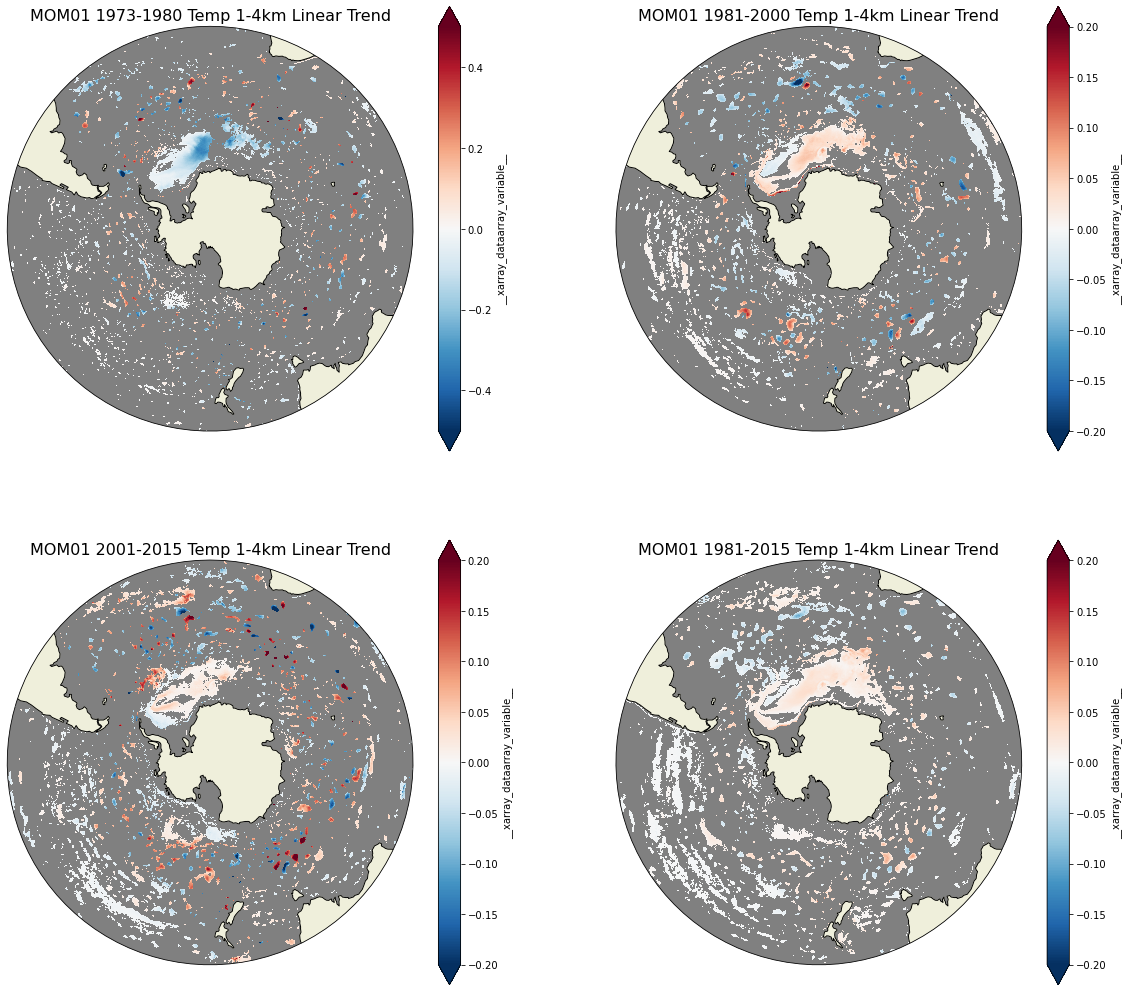

In [51]:
clev = np.arange(-.5,.55,.05)
clev = np.arange(-.2,.22,.02)

v1=-.5
v2=.5
pmax=0.05

fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(2,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr73to80_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr73to80_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM01 1973-1980 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


v1=-.2 #C/Decade *10 on load
v2=.2

ax = plt.subplot(2,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to00_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to00_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM01 1981-2000 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


ax = plt.subplot(2,2,3, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr01to15_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr01to15_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM01 2001-2015 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

ax = plt.subplot(2,2,4, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to15_Tanom_1to4_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to15_Tanom_1to4_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM01 1981-2015 Temp 1-4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)



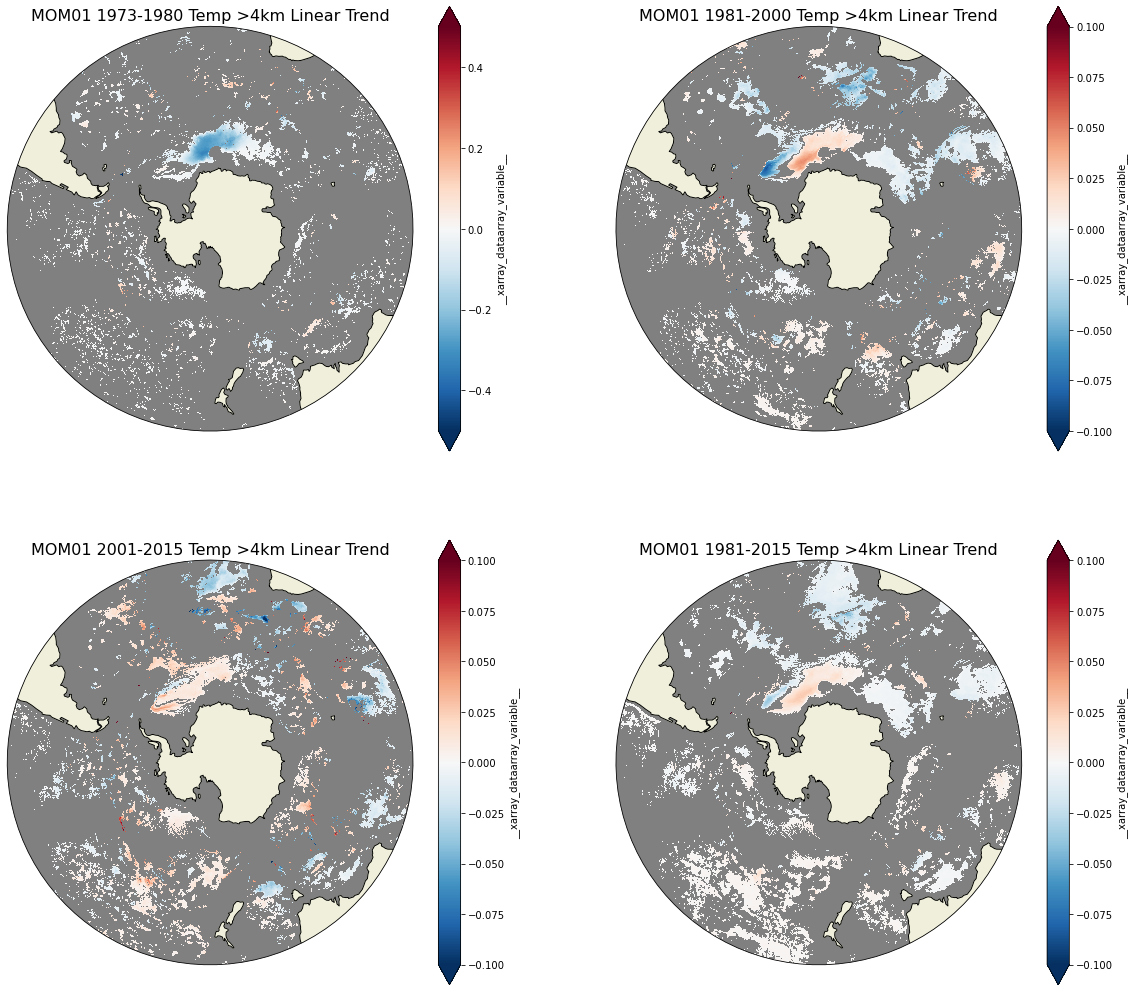

In [52]:
clev = np.arange(-.5,.55,.05)
clev = np.arange(-.2,.22,.02)

v1=-.5
v2=.5
pmax=0.05

fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(2,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr73to80_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr73to80_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM01 1973-1980 Temp >4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


v1=-.1 #C/Decade *10 on load
v2=.1

ax = plt.subplot(2,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to00_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to00_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM01 1981-2000 Temp >4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)


ax = plt.subplot(2,2,3, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr01to15_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr01to15_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM01 2001-2015 Temp >4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

ax = plt.subplot(2,2,4, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([0, 360, -80, -30], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

m=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to15_Tanom_4to6_m.nc').__xarray_dataarray_variable__*10
p=xr.open_dataset('/g/data/hh5/tmp/pas561/kds75_wp2/2yr/mom01_tr81to15_Tanom_4to6_p.nc').__xarray_dataarray_variable__

p1 = m.where(p<=pmax).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=True,cmap=plt.cm.RdBu_r, vmin=v1, vmax=v2, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p1 = trend_1970s_4km[0].where(trend_1970s_4km[0]!=0).plot.contourf(x='lon', y='lat', add_colorbar=True,cmap=cmocean.balance, levels=clev, extend='both', transform=ccrs.PlateCarree()) #vmin=-.05, vmax=.05
#p2 = en4.depth.plot.contour(ax=ax,
#                       x='lon', y='lat', levels=[1000], colors='k',linewidth=1,
#                       transform=ccrs.PlateCarree())

tit='MOM01 1981-2015 Temp >4km Linear Trend'
plt.title(tit,fontsize = 16)
ax.coastlines()
ax.add_feature(cfeature.LAND)

